In [26]:
%run ./"0 Imports and functions.ipynb"
#
# Load cube information and result files
#
#
#

# Take the line information:
#File_Descriptor_a="NGC_253_HCN_J1-0_" 

#FD_a,FD_b,FD_c = "NGC_253_HCN_J1-0_","NGC_253_HCO+_J1-0_","NGC_253_CO_J3-2_"

#FD_d,FD_e,FD_f = "cmz_HCN_J1-0_","cmz_HCO+_J1-0_","cmz_CO_J3_2_"
#FD_d,FD_e,FD_f = "cmz_HCN_J1-0_","cmz_HCO+_J1-0_",'cmz_CO_J3_2_INSANE'

File_Descriptors_NGC = [
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
]

File_Descriptors_cmz = [
    "cmz_H13CN_J1_0_",
    "cmz_HCN_J1-0_",
    "cmz_H13COp_J1_0_",
    "cmz_3mm_HCO+_J1-0_",
    "cmz_CO_J3_2__",
    "cmz_CO_J1_0_",
    "cmz_SiO_J2_1_",
    "NOT AVAILABLE",
    "cmz_HCN_J4_3_",
    "NOT AVAILABLE"
]



for i in range(len(File_Descriptors_cmz)):
    #File_Descriptors_cmz[i]+="Low_Delta_"
    pass
for i in range(len(File_Descriptors_NGC)):
    #File_Descriptors_NGC[i]+="Low_Delta_"
    pass
print( File_Descriptors_NGC)

print( File_Descriptors_cmz)
#File_Descriptors_NGC = [FD_a,FD_b,FD_c] # 
#File_Descriptors_NGC = [FD_a,FD_c] # 
#File_Descriptors_cmz = [FD_d,FD_f]

##################################
##################################
#Load cube info and result files
##################################

import pickle 


Cube_Information_NGC = []
Pointing_Information_NGC = []
Results_NGC=[]
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_NGC=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio]
i=0
for fd in File_Descriptors_NGC:
    try:
        print(i)
        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_NGC.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_NGC.append( pickle.load(file))

        File_Name = Cube_Information_NGC[i]['File_Name']
        #if(i==1):
        #File_Name = "Cropped_4.3pc_beam_NGC_253_HCN_J1-0_72.0x360.0pc_reprojected_3.4_vel_res_.fits"

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:

            Results_NGC.append( pickle.load(file))

        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_NGC.append( pickle.load(file))
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
        i+=1

    except:
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        Fit_Results_NGC.append(Fit_Results_NGC[0])
        print(fd,"FAILED")
        i+=1


        
Cube_Information_CMZ = []
Pointing_Information_CMZ = []
Results_CMZ=[] #Statistics: Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err
# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results_CMZ=[] #Fits: [Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio] all for LS fits
i=0
for fd in File_Descriptors_cmz:
    try:
        print(i)
        if fd == "NOT AVAILABLE":
            File_Name = File_Descriptors_NGC[i] + "Is not available in the CMZ"
 


        with open("Spectral Cubes/Cube Information/"+fd+"_Cube_Information", 'rb') as file:

            Cube_Information_CMZ.append( pickle.load(file))

        with open("Spectral Cubes/Cube Information/"+fd+"_Pointing_Information", 'rb') as file:

            Pointing_Information_CMZ.append( pickle.load(file))

        File_Name = Cube_Information_CMZ[i]['File_Name']
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results", 'rb') as file:
            
            Results_CMZ.append( pickle.load(file))
        with open("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'rb') as file:

            Fit_Results_CMZ.append( pickle.load(file))

        i+=1
        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"LOADED")
    except:
        Fit_Results_CMZ.append(copy.deepcopy(Fit_Results_CMZ[0]))
        Cube_Information_CMZ.append(Pointing_Information_CMZ[0])
        Pointing_Information_CMZ.append( Pointing_Information_CMZ[0])
        Results_CMZ.append( Results_CMZ[0])



        print("Result Files/"+fd+File_Name[0:len(File_Name)-5]+"_Results")

        print(fd,"FAILED")
        i+=1







/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
spectral_cube 0.6.1.dev22+g003ef16
spectral_cube file path /home/ben/.local/lib/python3.8/site-packages/spectral_cube/__init__.py
reproject 0.8
3.3.4 Matplotlib
/home/ben/miniconda3/lib/python3.8/site-packages/matplotlib/__init__.py
1.23.1 Numpy
astrodendro_file: /home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py
Results will be saved to Directory ./Result Files
Cubes will be saved and loaded with Directory ./Spectral Cubes
Plots will be saved to Directory ./Plots
Dendrograms will be saved to Directory ./Dendrograms
['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_']
['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_

# Function for creating plot of leaves/branches/all for RL MOM0


In [25]:


#make a meta function for doing the plots of leaves and branches and stuff
def make_plots(CMZ_Names,NGC_Names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[False,[0]],min_rs=[0],max_rs=[0],which="All",save_name="",fs=10,plot_2=True,plot_errors=False,ls=12,figsize=(8,8)):

    CMZ_names = CMZ_Names
    NGC_names = NGC_Names
    MCMC=MCMC
    if MCMC:
        ls= False
    else:
        ls=True
    use_manual_error_v=use_manual_error_v_[0]
    use_manual_error_r=use_manual_error_r_[0]
    min_rs = min_rs
    max_rs = max_rs
    r_errs=use_manual_error_r_[1]
    v_errs=use_manual_error_v_[1]



    #Err propagation function for Sigma = A*r^b
    #
    def propagate(r,A,b,A_err,b_err):
        ds_over_db = A*r**b*np.log(r)
        ds_over_dA = r**b
        err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
        return err_prop #returns the propagated error at the point r

    print(File_Descriptors_NGC,File_Descriptors_cmz)
    for i in range(len(File_Descriptors_NGC)):
        scatter_alpha = 1 #the alpha of points on the graph

        er_r=3 # the amount of error to show
        ############################################################        
        #
        #
        #Get shared info:        

        Prime_Beam = Cube_Information_NGC[i]["desired_beam_size"]
        vel_prime = Cube_Information_NGC[i]["desired_velocity_resolution"]
        ovs = Cube_Information_NGC[i]["desired_beam_oversampling"]
        #Check teh resolutions
        if(Prime_Beam != Cube_Information_CMZ[i]["desired_beam_size"] or  vel_prime != Cube_Information_CMZ[i]["desired_velocity_resolution"]):
            print("The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:")
            print(Prime_Beam, Cube_Information_CMZ[i]["desired_beam_size"])
            print(vel_prime, Cube_Information_CMZ[i]["desired_velocity_resolution"])
            print(File_Descriptors_NGC[i],File_Descriptors_cmz[i])
            #break

        ###########################################################################
        #
        #
        #
        #make figure




        # make lines showing the minimum resolutions for the structures
        min_space=np.array([[np.full(100,Prime_Beam/ovs)],[np.linspace(-100,1000,100)]])
        Beams_s=np.array([[np.full(100,Prime_Beam)],[np.linspace(-100,1000,100)]])
        spec=np.array([[np.linspace(-100,1000,100)],[np.full(100,vel_prime)]])
        zeroes=np.array([[np.full(100,0)]])



        ##########################################################################################
        #
        # CMZ data
        #
        #
        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]

        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]




        #print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        def strip_units(quantity_list):
            return [q.value for q in quantity_list]
        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]), (np.concatenate((strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################
        
            
        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
            
        RMS_Velocity_All = (np.array(RMS_Velocity_All))  
        RMS_Velocity_All*=(Cube_Information_CMZ[i]["desired_beam_size"].value/ovs)**2
        RMS_Velocity_All = RMS_Velocity_All.tolist()
        #set the scatterplot alpha based on the unmber on points
        if len(Size_All)>500:
            scatter_alpha=.5
        
            
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]
        #
        #
        #MCMC fit
        #
        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        if MCMC:

            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
                
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]

           
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)

        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_cmz[i]},plot_plot=False)
        if ls:
            print("Using Least Squares fit","min r =",min_rs[i])
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            if use_manual_error_v:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i]," v_err =",v_errs[i],"min r =",min_rs[i])
            else:
                print("Using MCMC fit with assumed errors, r_err = ",r_errs[i],"min r =",min_rs[i])
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1],0],[0,fit.a['MCMC'][1]]]


        #save fit results
        fit_results_cmz[0].append(Vars)
        fit_results_cmz[1].append(CoVar)
        #
        #
        #Assemble the scatter plot
        #


        Title = str(File_Descriptors_cmz[i] + " Compare to " + File_Descriptors_NGC[i] + " Radius-Luminosity") + "  " +addon+save_name
        xticks = np.linspace(0,20,10,dtype = type(2))
        yticks = np.linspace(0,30,10,dtype = type(2))
        xlabels,ylabels = xticks,yticks
        #Use a function with all my presets in it:
        fig,ax = Setup_Comp_Plot(Title,axes=["",""],xlim=[0,20],ylim=[0,30],xticks=xticks,yticks=yticks,xlabels=xlabels,ylabels=ylabels,args={"lims":False,'ts':fs,'ls':ls},figsize=figsize)
        print()
        print(Title)
        print()
        ax.set_xscale('log')
        ax.set_yscale('log')

        #x axis:
        x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 
        
        ax.set_aspect('auto')


        min_r=.5
        if File_Descriptors_cmz[i].find("NOT AVAILABLE")==-1:
            stri = f"CMZ A = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  b = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"

            ax.annotate(stri,xy=(0.301,.071),xycoords="axes fraction") 

            print("CMZ fit params and covariance error:","a = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", b = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="teal",label="CMZ")
            ax.scatter(Size_All,RMS_Velocity_All,color="teal",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="teal",alpha=scatter_alpha)

            

            #def propagate(r,A,b,A_err,b_err):
            err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
            #for estimated error:
            ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="teal")
            ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
            ax.set_ylabel(r'$L   (K km/s * pc^2)$',fontsize=15)
            #set min r
            min_r = np.nanmin(Size_All)

        else:
            print(File_Descriptors_NGC[i],"is not available in the CMZ")
            

        #set minimum for the graph

        min_sigma = func(min(Size_All),Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r)
        if (np.nanmin(RMS_Velocity_All) < min_sigma):
            min_sigma = np.nanmin(RMS_Velocity_All)
        ##########################################################################################
        ##########################################################################################
        ##########################################################################################
        #
        # NGC data
        #
        #

        try:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_NGC[i]
        except:
            Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_NGC[i]
            

        
        
        Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_NGC[i][0]
        Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_NGC[i][1],Fit_Results_NGC[i][2]
        print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )
        #Split the arrays, and strip the units so i can plot them:

        ###########################################################################
        # Convert each to unitless lists
        Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
        ###########################################################################
        RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]), (np.concatenate((strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]))))
        ###########################################################################
        V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
        ###########################################################################
        r_err_Leaves, r_err_Branches, r_err_All = strip_units(r_err[0]), strip_units(r_err[1]), (np.concatenate((strip_units(r_err[0]), strip_units(r_err[1]))))
        ###########################################################################
        ###########################################################################

        
        if which == "All":
            addon=""
            pass
        elif which == "Leaves":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Leaves"
            Size_All =Size_Leaves
            r_err_All=r_err_Leaves
            V_rms_err_All=V_rms_err_Leaves
            RMS_Velocity_All=RMS_Velocity_Leaves
        elif which == "Branches":
            del Size_All #in a very poor way, just substitute the leaves for the "all" array, which is the one being analyzed
            del r_err_All
            del V_rms_err_All
            del RMS_Velocity_All
            addon="Branches"
            Size_All =Size_Branches
            r_err_All=r_err_Branches
            V_rms_err_All=V_rms_err_Branches
            RMS_Velocity_All=RMS_Velocity_Branches
        #The variables and the covariance matrix for the current fit:
        Vars,CoVar = Size_Linewidth_All[0],Size_Linewidth_All[1]

        RMS_Velocity_All = (np.array(RMS_Velocity_All))  
        RMS_Velocity_All*=(Cube_Information_NGC[i]["desired_beam_size"].value/ovs)**2
        RMS_Velocity_All = RMS_Velocity_All.tolist()      

        
        for k in range(len(Size_All)):
            if Size_All[k]<min_rs[i]:
                Size_All[k]=np.nan
            if Size_All[k]>max_rs[i]:
                Size_All[k]=np.nan
        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)
        #
        #
        #MCMC fit
        #
        
        if MCMC:
            if use_manual_error_v:

                V_rms_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    V_rms_err_All[w]=v_errs[i]
            if use_manual_error_r:
                r_err_All=copy.deepcopy(Size_All)
                for w in range(len(Size_All)):
                    r_err_All[w] = r_errs[i]


        _,RMS_Velocity_All = crossmatch(Size_All,RMS_Velocity_All)
        _,r_err_All = crossmatch(Size_All,r_err_All)
        Size_All,V_rms_err_All = crossmatch(Size_All,V_rms_err_All)


        fit = make_MCMC_fit(M_1=(Size_All),M_2=(RMS_Velocity_All),M_1_err=(r_err_All*1),M_2_err=(V_rms_err_All*1),nsteps=5000, nwalkers=50,input_="linear",temp=.1, args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":File_Descriptors_NGC[i]},plot_plot=False)

        if ls:
            Vars,CoVar = [fit.c['ls'][0],fit.a['ls'][0]],[[fit.c['ls'][1],0],[0,fit.a['ls'][1]]]
        else:
            Vars,CoVar = [fit.c['MCMC'][0],fit.a['MCMC'][0]],[[fit.c['MCMC'][1],0],[0,fit.a['MCMC'][1]]]


        if plot_2:
            ax.annotate("L = C*x^d",xy=(0.451,.101),xycoords="axes fraction")
            stri = f"NGC253 C = {np.round(Vars[0],2)} ± {np.round(np.sqrt(CoVar[0][0]),2)}  d = {np.round(Vars[1],2)} ± {np.round(np.sqrt(CoVar[1][1]),2)}"
            ax.annotate(stri, xy=(0.301, .041), xycoords="axes fraction")

            #
            #
            #Assemble the scatter plot
            #

            #x axis:
            x = np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50) 






            print("NGC253 fit params and covariance error:","C = ", Vars[0], " +- ",np.sqrt(CoVar[0][0]),", d = ", Vars[1], " +- ",np.sqrt(CoVar[1][1]))
            print()
            print("Structures plotted: ", len(Size_All))
            print()
            ax.plot(x,func(x,Vars[0],Vars[1]),color="deeppink",label="NGC253")
            ax.scatter(Size_All,RMS_Velocity_All,color="deeppink",alpha=scatter_alpha)
            if plot_errors:
                ax.errorbar(Size_All, RMS_Velocity_All, yerr=V_rms_err_All, fmt='o', capsize=5,color="deeppink",alpha=scatter_alpha)
        #save fit results
        fit_results_ngc[0].append(Vars)
        fit_results_ngc[1].append(CoVar)
        #def propagate(r,A,b,A_err,b_err):
        err_prop = propagate(x,Vars[0],Vars[1],np.sqrt(CoVar[0][0]),np.sqrt(CoVar[1][1]))*er_r #The propagated error for each point r = x, multiplied by 3 for 3 sigma
        #print(err_prop,"err")
        #print(func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)-func(x,Vars[0],Vars[1]))
        #for estimated error:
        ax.fill_between(x,func(x,Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r),func(x,Vars[0]-np.sqrt(CoVar[0][0])*er_r,Vars[1]-np.sqrt(CoVar[1][1])*er_r),alpha=.2,color="deeppink")
        ax.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
        ax.set_ylabel(r'$L (K km/s * pc^2)$',fontsize=15)



        ax.legend(loc='upper left',fontsize=18)
        #ax.set_yscale('symlog')
        #ax.set_xscale('symlog')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(min_r * 0.8, np.nanmax(Size_All) * 1.5)
        #ax.set_ylim(min(RMS_Velocity_All) * 0.8, max(RMS_Velocity_All) * 1.5)
        
        try:    
            if min_sigma * 0.8 < 1:
                ax.set_ylim(min_sigma * 0.8, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
            else:
                ax.set_ylim(1, func(max(Size_All),Vars[0]+np.sqrt(CoVar[0][0])*er_r,Vars[1]+np.sqrt(CoVar[1][1])*er_r)*1.1+2)
        except:
            ax.set_ylim(0,100)

        import matplotlib.ticker as ticker
        ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
        ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

        ax.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

        plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
        fig.savefig(("Plots RL/"+Title+".pdf"), dpi=600, bbox_inches='tight')
        fig.savefig(("Plots RL/Pngs/"+Title+".png"), dpi=600, bbox_inches='tight')

        
        pylab.show()








# functions for finding PDFs from MCMC fitting

In [27]:
#
#
#more functions for finding PDFs from MCMC fitting
###################################################################################################
#
#
#For non-log data fit to a power law using minimum neg-likelihood MCMC fitting
#
# linear fitting function, i.e. two parameter dimensions
def linear(x,a,c):
    return a*x+c
def func(R,a,b):
    return a*R**(b)
# equivalent power law function
def powlaw(x,a,b):
    return b*np.power(x,a)

# log likelihood
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnlikelihood(x, y, xerr, yerr, a, c):

    # only y errors:
    #model = linear(x,a,c)
    model = powlaw(x,a,c)
    #print("calculating likelihood of a, c",a,c,-0.5*(np.sum((y-model)**2/yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - np.log(yerr**2)))
    #return -0.5*(np.sum((y-model)**2/yerr**2 - yerr**2))
    
    #return -0.5*(np.sum((y-model)**2/yerr**2))# without the log offset

    #both x and y errors:
    xyerr = np.sqrt(xerr**2. + yerr**2.)
    model = powlaw(x,a,c)
    return np.sum(-0.5*((y-model)/xyerr)**2 - 0.5*np.log(2*np.pi)-np.log(xyerr))

# negative log likelihood (required to fit maximum likelihood)
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def neg_lnlikelihood(params, x, y, xerr, yerr):
    a, c = params
    return -lnlikelihood(x, y, xerr, yerr, a, c)

# log prior
# simple flat priors on slope and intercept, large range but exclude rediculous values
def lnprior(a,c):
    #if ( 0<a<10 ) and ( -10<c<10 ):
    #if ( 0<a<.95 ) and ( 0<c<10 ):
    if ( -2<a<2) and ( -10<c<10 ):
        return 0.0
        #return -np.inf
    else:
        return -np.inf
        #return 0
    '''
    # Gaussian priors centered on the expected values
    a_mean, a_std = 0.82, 0.5   # adjust std based on your confidence
    c_mean, c_std = 1.0, 5.0

    # Gaussian log prior
    logp_a = -0.5 * ((a - a_mean) / a_std)**2 - np.log(a_std * np.sqrt(2 * np.pi))
    logp_c = -0.5 * ((c - c_mean) / c_std)**2 - np.log(c_std * np.sqrt(2 * np.pi))

    return logp_a + logp_c
    '''


# log probability function
# according to https://ixkael.github.io/fitting-a-line-to-data-a-quick-tutorial/
def lnprobability(params, x, y, xerr, yerr):
    a, c = params
    lp = lnprior(a,c)
    #print(lp,a,c)
    if not np.isfinite(lp):
        #print(a,c,-np.inf)
        return -np.inf #If the a and c are out of the possible range, give an impossible flag
        
    #print("a,c, lp + lnlikelihood: ",a,c, lp + lnlikelihood(x, y, xerr, yerr, a, c))
    return lp + lnlikelihood(x, y, xerr, yerr, a, c) # If a and c are in the possible range, the lp (likelihood from prior knowledge ) is zero, which allows this to find the likelihood from the  data only



#
#
#


####################################################################################################
# a class to do the fitting
####################################################################################################

class MCMC_fit:

    def __init__(self, x, y, x_err, y_err, nsteps=5000, nwalkers=50, temp = 1e-2,nburnin=50):
        self.source = None
        self.line   = None
        self.fit    = False
        self.fit_range = [None,None]
        self.x      = np.array(x)
        self.y      = np.array(y)
        self.x_err  = np.array(x_err)
        self.y_err  = np.array(y_err)
        self.ndim = 2
        self.a    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.c    = {'ls': None, 'ml': None, 'MCMC': None, 'perc': None}
        self.nwalkers = nwalkers
        self.nburnin  = nburnin
        self.nsteps   = nsteps
        self.sampler  = None
        self.samples  = None
        self.xlabel   = 'x'
        self.ylabel   = 'y'
        self.figsize  = (6,6)
        self.plotcolor = None
        self.savepath = None
        self.temp = temp

    def mask_bad_values(self):
        print("masking bad values ...")
        good_vals = np.isfinite(self.x) & np.isfinite(self.y) & np.isfinite(self.x_err) & np.isfinite(self.y_err)
        self.x     = self.x[good_vals]
        self.y     = self.y[good_vals]
        self.x_err = self.x_err[good_vals]
        self.y_err = self.y_err[good_vals]

    def restrict_range(self, fit_range=[None,None]):
        self.fit_range = fit_range
        print("restricting fit to "+str(self.fit_range)+" ...")
        if not ( fit_range[0] == None ):
            in_range = self.x > self.fit_range[0]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]
        if not ( fit_range[1] == None ):
            in_range = self.x < self.fit_range[1]
            self.x     = self.x[in_range]
            self.y     = self.y[in_range]
            self.x_err = self.x_err[in_range]
            self.y_err = self.y_err[in_range]

    # least squares fit
    def least_squares_fit(self):
        print("least squares fitting ...")
        #coeff, covar = curve_fit(linear, self.x, self.y, sigma=self.y_err, p0=[2, 2])
        #coeff, covar = curve_fit(powlaw, self.x, self.y, sigma=self.y_err, p0=[1, 1],maxfev=9999099,ftol = 10**-10)
        coeff, covar = curve_fit(powlaw, self.x, self.y, p0=[1, .5],maxfev=9999099,ftol = 10**-10)
        print("Least squares fits to x and y, a and b:", coeff[0], coeff[1])
        a, c  = coeff
        a_err = covar[0][0]
        c_err = covar[1][1]
        self.a['ls'] = [a,a_err]
        self.c['ls'] = [c,c_err]

    # maximum likelihood fit
    def maximum_likelihood_fit(self):
        print("maximum likelihood fitting ...")
        #result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        result = scipy.optimize.minimize(neg_lnlikelihood, [self.a['ls'][0], self.c['ls'][0]], args=(self.x, self.y, self.x_err, self.y_err))
        self.a['ml'], self.c['ml'] = result["x"]

    # run MCMC fit
    def MCMC_fit(self):
        print("Bayesian MCMC fitting ...")
        # initial values for walkers from least squares and maximum likelihood fits
        #init_pos = [np.array([self.a['ml'], self.c['ml']]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        print("Least squares a c and ML:",self.a['ls'], self.c['ls'],self.a['ml'], self.c['ml'])
        init_pos = [np.array([.5, 1]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        #init_pos = [np.array([self.a['ls'][0], self.c['ls'][0]]) +self.temp*np.random.randn(self.ndim) for i in range(self.nwalkers)]
        # run MCMC
        self.sampler = emcee.EnsembleSampler(self.nwalkers, self.ndim, lnprobability, args=(self.x, self.y, self.x_err, self.y_err))
        # After the first run, reinitialize stuck walkers:
        self.sampler.run_mcmc(init_pos, self.nsteps)
        self.samples = self.sampler.chain[:, self.nburnin:, :].reshape((-1, self.ndim))
        print(self.samples)
        a_percentiles, c_percentiles = np.percentile(self.samples, [16, 50, 84], axis=0).T
        self.a['MCMC'] = [a_percentiles[1], a_percentiles[2]-a_percentiles[1], a_percentiles[1]-a_percentiles[0]]
        self.c['MCMC'] = [c_percentiles[1], c_percentiles[2]-c_percentiles[1], c_percentiles[1]-c_percentiles[0]]
        self.a['perc'] = [a_percentiles[0], a_percentiles[1], a_percentiles[2]]
        self.c['perc'] = [c_percentiles[0], c_percentiles[1], c_percentiles[2]]
        
        
    def reinitialize_stuck_walkers(self, extra_steps=1000, noise_scale=None):
        print("Checking for stuck walkers (lnprob = -inf)...")

        lnprob = self.sampler.lnprobability  # shape (nwalkers, nsteps)
        final_lnprob = lnprob[:, -1]
        stuck_walkers = np.isneginf(final_lnprob)

        if not np.any(stuck_walkers):
            print("No stuck walkers found.")
            return

        print(f"Reinitializing {np.sum(stuck_walkers)} stuck walkers...")

        # Get good positions
        good_positions = self.sampler.chain[~stuck_walkers, -1, :]
        good_lnprobs = final_lnprob[~stuck_walkers]

        if noise_scale is None:
            noise_scale = self.temp

        # Propose new positions around the median of good ones
        median_pos = np.median(good_positions, axis=0)
        new_positions = [median_pos + noise_scale * np.random.randn(self.ndim)
                         for _ in range(np.sum(stuck_walkers))]

        # New initial positions
        init_pos2 = np.vstack((good_positions, new_positions))

        # Continue sampling
        self.sampler.reset()
        print(f"Running {extra_steps} additional MCMC steps...")
        self.sampler.run_mcmc(init_pos2, extra_steps)

        self.samples = self.sampler.get_chain(discard=50, flat=True)
        print("Done reinitializing and continuing MCMC.")


        
        
        

    # plot walkers
    def plot_walkers(self,plot_plot=True):
        print("plotting walkers ...")
        fig,ax = plt.subplots(2, sharex=True)
        for w in np.arange(self.nwalkers):
            ax[0].plot(self.sampler.chain[w,:,0], color='k', linestyle='-', alpha=0.1)
            ax[1].plot(self.sampler.chain[w,:,1], color='k', linestyle='-', alpha=0.1)
        ax[1].set_xlabel('step')
        ax[0].set_ylabel('slope a')
        ax[1].set_ylabel('intercept c')
        ax[1].set_xlim(0,self.nsteps)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.walkers.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # corner plot
    def corner_plot(self,plot_plot=True):
        print("plotting parameter distributions ...")
        fig = corner.corner(self.samples, labels=['a', 'c'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.corner.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    # plot x - y relation
    def plot_x_y(self,plot_plot=True):
        print("plotting x - y relation ...")
        fig,ax = plt.subplots(figsize=self.figsize)
        ax.scatter(np.power(10,self.x), np.power(10,self.y), marker='.', color='k', label='data', s=1, alpha=0.5, zorder=0)
        x = np.logspace(np.min(self.x)-np.log10(1.5), np.max(self.x)+np.log10(1.5), 100)

        # plot most likely
        ax.plot(x, powlaw(x,self.a['MCMC'][0],np.power(10,self.c['MCMC'][0])), lw=1, color="r", zorder=2, label='50 percentile fit')

        # plot random samples
        a, c = self.samples[np.random.randint(len(self.samples), size=1)][0]
        b = np.power(10,c)
        ax.plot(x, powlaw(x,a,b), color="k", alpha=0.1, zorder=2, label='random samples')
        for a, c in self.samples[np.random.randint(len(self.samples), size=10)]:
            b = np.power(10,c)
            ax.plot(x, powlaw(x,a,b), color="k", lw=1, alpha=0.1, zorder=1)

        ax.legend()
        ax.set_xlabel(self.xlabel)
        ax.set_ylabel(self.ylabel)
        ax.set_xscale('log')
        ax.set_yscale('log')
        #ax.set_xlim([0.75*np.power(10,np.min(self.x)),1.5*np.power(10,np.max(self.x))])
        #ax.set_ylim([0.75*np.power(10,np.min(self.y)),  1.5*np.power(10,np.max(self.y))])
        ax.set_xlim([1,3])
        ax.set_ylim([1,3])
        mkdir(escape_filename(self.savepath))
        fig.savefig(os.path.join(self.savepath, self.source+'.'+self.line+'.xy.png'), dpi=300, bbox_inches='tight')
        if plot_plot==False:
            plt.close(fig)

    def list_results(self):
        print("\n\n")
        print(self.source+" "+self.line)
        print("  "+'{:>10}{:>10}{:>10}'.format('least sq','max like','MCMC'))
        print("a "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.a['ls'][0], self.a['ml'], self.a['MCMC'][0]))
        print("a-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][1]))
        print("a+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.a['ls'][1], "",           self.a['MCMC'][2]))
        print("c "+'{:10.6f}{:10.6f}{:10.6f}'.format(self.c['ls'][0], self.c['ml'], self.c['MCMC'][0]))
        print("c-"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][1]))
        print("c+"+'{:10.6f}{:>10}{:10.6f}'.format(  self.c['ls'][1], "",           self.c['MCMC'][2]))
        print("\n\n")

    def get_y10(self):
        """Calculate y for a scale of 10. This is more meaningful than the intercept (scale=1)."""
        # MCMC
        a  = self.a['perc'][1]
        am = self.a['perc'][0]
        ap = self.a['perc'][2]
        c  = self.c['perc'][1]
        cm = self.c['perc'][0]
        cp = self.c['perc'][2]
        # least squares
        a_ls     = self.a['ls'][0]
        a_ls_err = self.a['ls'][1]
        c_ls     = self.c['ls'][0]
        c_ls_err = self.c['ls'][1]
        y10_ls     = powlaw(10, a_ls, np.power(10,c_ls))
        y10_ls_err = np.log(10)*np.power(10,a_ls+c_ls) *np.sqrt(a_ls_err**2+c_ls_err**2)

        # best fit sigma10
        self.y10 = {'MCMC': [powlaw(10, a, np.power(10,c)), powlaw(10, am, np.power(10,cm)), powlaw(10, ap, np.power(10,cp))],
                    'ls':   [y10_ls, y10_ls_err]}

        # distribution of sigma10
        self.y10s = {'MCMC': [powlaw(10, a, np.power(10,c)) for a, c in self.samples[np.random.randint(len(self.samples), size=100)]]}


####################################################################################################
# fit and plot meta function
####################################################################################################

def fit_MCMC(log_x, log_y, log_x_err, log_y_err, source, line, savepath, xlabel=None, ylabel=None, plotcolor='r', fit_range=[None,None],nsteps=5000, nwalkers=50,temp=1e-2,plot_plot=False):
    MCMC = MCMC_fit(log_x, log_y, log_x_err, log_y_err)
    MCMC.savepath = savepath
    MCMC.source   = source
    MCMC.line     = line
    MCMC.plotcolor = plotcolor
    MCMC.xlabel   = xlabel
    MCMC.ylabel   = ylabel
    MCMC.temp=temp

    MCMC.mask_bad_values()
    MCMC.restrict_range(fit_range)
    MCMC.least_squares_fit()
    MCMC.maximum_likelihood_fit()
    MCMC.MCMC_fit()
    MCMC.plot_walkers(plot_plot=plot_plot)
    MCMC.corner_plot(plot_plot=plot_plot)
    MCMC.plot_x_y(plot_plot=plot_plot)
    MCMC.get_y10()
    MCMC.fit = True
    MCMC.list_results()

    return MCMC


####################################################################################################
# print formatted slopes and intercepts
####################################################################################################

def print_formatted(MCMC_list, datatype):
    print(datatype)
    print('{:>8} & {:>10} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>6} & {:>8} & {:>8} & {:>8}'.format('source','line','a_16','a_50','a_84','c_16','c_50','c_84','y10','y10 -','y10 +'))
    for m in MCMC_list:
        try:
            print('{:>8} & {:>10} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:6.2f} & {:8.1f} & {:8.1f} & {:8.1f}'.format(m.source, m.line, m.a['perc'][0], m.a['perc'][1], m.a['perc'][2], m.c['perc'][0], m.c['perc'][1], m.c['perc'][2], m.y10[0], m.y10[1], m.y10[2]))
        except:
            print('{:>8} & {:>10} & {:<10}'.format(m.source, m.line, 'no fit'))
            
def mkdir(path):
    """mkdir
    Parameters
    ----------
    path : str
        Path to directory to create
    """
    import os
    if ' ' in path:
        raise Exception("Path contains spaces! This will most probably not create the directory you want!")
    if not os.path.exists(path):
        os.system('mkdir -p '+path)
        print("Created "+path)
        
def escape_filename(str):
    """Escape the most often used characters in a string to be used as a file name.
    Parameters
    ----------
    str : str
        Input string to be escaped.
    Returns
    -------
    str
        String with escaped '(', ')'; replaced ' ' by '_' and removed '$'.
        
    """
    str = str.replace('(',r'\(')
    str = str.replace(')',r'\)')
    str = str.replace(' ',r'_')
    str = str.replace('$','')
    return str

def crossmatch(*args):
    """Crossmatch lists for non-finite values.
    Parameters
    ----------
    x : list
    y : list
    ...
    Returns
    -------
    list, list
        Lists in input order with the non-finite (infinite and NaN) values removed from the list and
        also the corresponding element of the other list.
    """
    import numpy as np

    lists = []
    for list in args:
        lists.append( np.array(list) )

    selection = np.isfinite(lists[0])
    for list in lists[1:]:
        selection = selection & np.isfinite(list)

    matched_lists = []
    for list in lists:
        matched_lists.append( list[selection] )

    return matched_lists


#Split the arrays, and strip the units so i can plot them:
def strip_units(quantity_list):
    return [q.value for q in quantity_list]


from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import scipy.optimize as op
import emcee
import corner


# Function for Plotting and MCMC fits for a set of data

In [28]:
#Make a _MCMC plot for some measures, fit to the form y = A*x^b

def propagate_to_log(r,A,b,A_err,b_err):
    ds_over_db = A*r**b*np.log(r)
    ds_over_dA = r**b
    err_prop = np.sqrt((ds_over_dA*A_err)**2 + (ds_over_db*b_err)**2)
    return err_prop #returns the propagated error at the point r



def make_MCMC_fit(M_1,M_2,M_1_err,M_2_err,args={"Label":"LS","Label2":"MCMC", "SAVE_NAME":"tt.png","SOURCE":"NA"},nsteps=5000, nwalkers=50,input_="log",temp=1e-2,plot_plot=True):

    print("input data is of type",input_,"fitting to powerlaw...")
    
    print(M_1[0],M_2[0],M_2_err[0],M_1_err[0])
    x_matched, y_matched = crossmatch(M_1,M_2)
    _,x_err_matched = crossmatch(M_1,M_1_err)
    _,y_err_matched = crossmatch(M_1,M_2_err)
        


    x     = np.array(x_matched)
    y     = np.array(y_matched)
    x_err = np.array(x_err_matched)
    y_err = np.array(y_err_matched)

    fit = fit_MCMC(log_x     = (x),
                   log_y     = (y),
                   log_x_err = x_err,            
                   log_y_err = y_err,
                   source="", line=args["SOURCE"],
                   xlabel =" R",
                   ylabel = "V_rms",
                   savepath = "",
                   temp=temp,
                   plot_plot=plot_plot
                  )
    #fit.reinitialize_stuck_walkers(extra_steps=2000)

    #x = np.logspace(np.log10(np.min(x)), np.log10(np.max(x)), 10)
    #y = np.logspace(np.log10(np.min(y)), np.log10(np.max(y)), 10)
    x = np.linspace((np.min(M_1)), (np.max(M_1)), 20)
    y = np.linspace((np.min(M_2)), (np.max(M_2)), 20)
        
    #
    #
    #Make plot
    #fig,ax = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30])
    fig_prime,ax_prime = Setup_Comp_Plot(Title=args["Label"],axes=["",""],xlim=[0,20],ylim=[0,30],xticks = x, yticks=y,figsize=(24,24))

    #ax_prime.scatter(x_matched,y_matched)
    ax_prime.scatter(M_1,M_2)
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    #ax_prime.plot(x, powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0])), color="deeppink", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="deeppink", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="deeppink", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],np.power(10,fit.c['ls'][0]))), color="deeppink", zorder=4,label=args["Label"])
    ax_prime.plot(x, (powlaw(x,fit.a['ls'][0],fit.c['ls'][0])), color="deeppink", zorder=4,label=args["Label"])
    #ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],np.power(10,fit.c['MCMC'][0]))), color="red", zorder=4,label=args["Label2"])
    ax_prime.plot(x, (powlaw(x,fit.a['MCMC'][0],fit.c['MCMC'][0])), color="red", zorder=4,label=args["Label2"])
    ax_prime.annotate("L = C*x^d",xy=(0.51,.051),xycoords="axes fraction")
    #stri = "A = "+str(fit.y10['MCMC'][0]/10**fit.a['MCMC'][0]), "+-",  "b = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    stri = "C = "+str(fit.c['MCMC'][0]), "+-"+str(np.sqrt(fit.c['MCMC'][1])),  "d = ",fit.a['MCMC'][0], "+-",str( np.sqrt(fit.a['MCMC'][1]) ),
    ax_prime.annotate(stri,xy=(0.51,.1),xycoords="axes fraction")
    #ax_prime.annotate("A = "+str(np.power(10,fit.c['MCMC'][0])),xy=(0.51,.15),xycoords="axes fraction")# same way of getting A
    #stri = "LS A = "+str(fit.y10['ls'][0]/10**fit.a['ls'][0]), "+-",  "b = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    stri = "LS C = "+str(fit.c['ls'][0]), "+-"+str(np.sqrt(fit.c['ls'][1])),  "d = ",fit.a['ls'][0], "+-",str( np.sqrt(fit.a['ls'][1]) ),
    
    ax_prime.annotate(stri,xy=(0.51,.2),xycoords="axes fraction")    
    
    # equivalent power law function
    #def powlaw(x,a,b):
    #    return b*np.power(x,a)
    
    
    ax_prime.set_xlabel(r'$R_{astrodendro}$ (pc)',fontsize=15)
    ax_prime.set_ylabel(r'$L (K km/s *pc^2)$',fontsize=15)
    
    
    ax_prime.legend(loc='upper left',fontsize=18)
    #ax_prime.set_yscale('symlog')
    #ax_prime.set_xscale('symlog')
    ax_prime.set_yscale('log')
    ax_prime.set_xscale('log')
    
    ax_prime.set_xlim(min(M_1) * 0.8, max(M_1)*1.2)
    ax_prime.set_ylim(min(M_2) * 0.8, max(M_2)*1.2)
    
    import matplotlib.ticker as ticker
    ax_prime.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
    ax_prime.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))

    ax_prime.tick_params(axis='both', which='minor', length=4, width=2, color='gray',direction='in')  # Adjust length, width, and color

    
    
    


    print("LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['ls'][0]     ,    np.sqrt(fit.a['ls'][1])   ,      fit.y10['ls'][0], np.sqrt(fit.y10['ls'][1]),fit.y10['ls'][0]/10**fit.a['ls'][0])
    
    print("MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A)", fit.a['MCMC'][0]     ,    np.sqrt(fit.a['MCMC'][1])   ,      fit.y10['MCMC'][0], np.sqrt(fit.y10['MCMC'][1]), fit.y10['MCMC'][0]/10**fit.a['MCMC'][0])



    fname = args["SAVE_NAME"]

    fig_prime.savefig(bbox_inches='tight',fname="Plots/"+fname+".pdf",dpi=600)

    plt.tight_layout(pad=5, w_pad=5 ,h_pad=50.0)
    if plot_plot:
        pylab.show()
    else:
        plt.close(fig_prime)
        
    return fit




# 4a. Size-Linewidth Plots Comparison

In [30]:
#Verify units/check values cmz/ngc
for i in range(len(File_Descriptors_cmz)):
    try:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances = Results_CMZ[i]
    except:
        Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,r_err = Results_CMZ[i]
    Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All = Fit_Results_CMZ[i][0]
    Radius_Luminosity_All,CD_SL_Ratio = Fit_Results_CMZ[i][1],Fit_Results_CMZ[i][2]
    print("Size in", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit,   ". ",File_Descriptors_cmz[i],np.shape(Results_CMZ[i]),'with',len(Results_CMZ[i][0][0]), "leaves and",len(Results_CMZ[i][0][1]) ,'branches')




Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13CN_J1_0_ (9, 2) with 42 leaves and 16 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_HCN_J1-0_ (9, 2) with 104 leaves and 31 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_H13COp_J1_0_ (9, 2) with 19 leaves and 9 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_3mm_HCO+_J1-0_ (9, 2) with 31 leaves and 13 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J3_2__ (9, 2) with 924 leaves and 325 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_CO_J1_0_ (9, 2) with 173 leaves and 65 branches
Size in pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s .  cmz_SiO_J2_1_ (9, 2) with 23 leaves and 5 branches
Si

# All, leaves, branches RL fits:


['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 97.06831198986582 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.509747477891824 25.173674730493545
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.509747477891824, 0.05108402510942389] [25.173674730493545, 160.79969814891513] 2.927933296368625 8.796799817365843
[[1.85809076 5.70601405]
 [1.85809076 5.70601405]
 [1.91334336 6.79118744]
 ...
 [1.99999993 9.99999741]
 [1.99

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   2.509747  2.927933  2.000000
a-  0.051084            0.000000
a+  0.051084            0.000000
c  25.173675  8.796800  9.999997
c-160.799698            0.000002
c+160.799698            0.000006



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.509747477891824 0.2260177539695143 4.82416560991526e+27 1336477261212130.0 1.491676783789159e+25
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998583270333 0.00032663872005780925 999992704168.487 999989.6058431271 9999930303.802214
Using Least Squares fit min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  25.173674730493545  +-  12.680682085318404 , b =  2.509747477891824  +-  0.2260177539695143

Structures plotted:  58

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.2279631413230123 4

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   1.532692  1.772095  2.000000
a-  0.048768            0.000000
a+  0.048768            0.000000
c 3104.6362981742.000297  9.999999
c-2323881.821585            0.000001
c+2323881.821585            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5326923684703142 0.22083566440668934 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999665007848 0.00015983688236282664 999998217169.388 999997.4775812533 9999982943.040468
NGC253 fit params and covariance error: C =  3104.6362981198445  +-  1524.4283589545323 , d =  1.5326923684703142  +-  0.22083566440668934

Structures plotted:  15



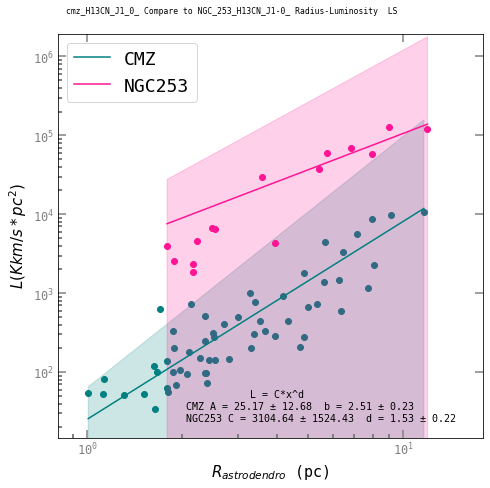

input data is of type linear fitting to powerlaw...
2.533431136416782 562.5066824035249 2.2458997491321253 0.002200446276190057
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.4213232062849808 197.24582100910104
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.4213232062849808, 0.015852693437803104] [197.24582100910104, 3411.6763508257154] 3.248325396678507 20.089569292423178
[[ 1.75740168  6.02079584]
 [ 1.75740168  6.02079584]
 [ 1.75740168  6.02079584]
 ...
 [ 1.99999995  9.99999999]
 [ 1.99999995  9.99999999]
 [ 1.99999994 10.        ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   2.421323  3.248325  2.000000
a-  0.015853            0.000000
a+  0.015853            0.000000
c 197.245821 20.089569 10.000000
c-3411.676351            0.000000
c+3411.676351            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4213232062849808 0.12590747967377913 4.646695515868658e+199 6.04176549500898e+101 1.761250012099868e+197
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999892959908 8.973042642927391e-05 999999476473.4937 999999.2381570647 9999995011.203732
Using Least Squares fit min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  197.24582100910104  +-  58.40955701617429 , b =  2.4213232062849808  +-  0.12590747967377913

Structures plotted:  135

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.885531904666

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   1.926462  2.154440  2.000000
a-  0.009934            0.000000
a+  0.009934            0.000000
c 8043.0067094354.264653 10.000000
c-3906835.848912            0.000000
c+3906835.848912            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9264621282872496 0.09967156695646993 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999984328363 3.443935924004189e-05 999999911013.7366 999999.8699226466 9999999146.222641
NGC253 fit params and covariance error: C =  8043.0067092482095  +-  1976.5717414026594 , d =  1.9264621282872496  +-  0.09967156695646993

Structures plotted:  49



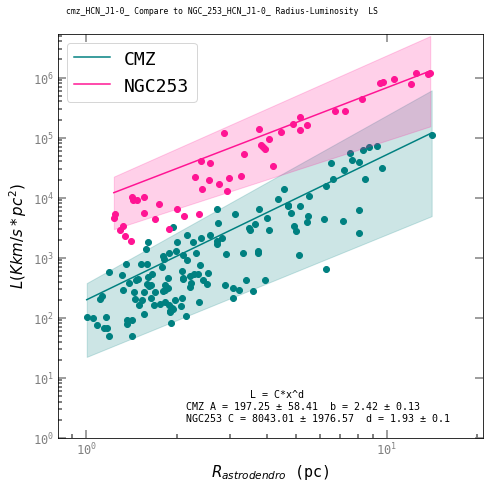

input data is of type linear fitting to powerlaw...
6.2773702492551795 519.4517452566075 2.0382323662032324 0.09729476048125324
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.0639387816670753 24.376858187112717
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.0639387816670753, 0.029636581325234352] [24.376858187112717, 97.56665003302952] 2.4862548583168413 7.735117737284354
[[1.97653875 8.30695323]
 [1.97653875 8.30695323]
 [1.97653875 8.30695323]
 ...
 [1.99999833 9.99999329]
 [1.99999833 9.9999933 ]
 [1.99999886 9.99999563]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   2.063939  2.486255  2.000000
a-  0.029637            0.000000
a+  0.029637            0.000001
c  24.376858  7.735118  9.999990
c- 97.566650            0.000008
c+ 97.566650            0.000019



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0639387816670753 0.17215278483148147 2.759287596909417e+26 248975742149405.94 2.3815416827107594e+24
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999995329696247 0.0005932883418070594 999974757806.6466 999964.4696454899 9999758331.5726
Using Least Squares fit min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  24.376858187112717  +-  9.877583208104577 , b =  2.0639387816670753  +-  0.17215278483148147

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.838466231298

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   1.740283  2.018776  2.000000
a-  0.026513            0.000000
a+  0.026513            0.000000
c 1371.214418692.512413  9.999999
c-247621.511367            0.000000
c+247621.511367            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.7402825351675322 0.16282869292654942 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999723310131 0.00014450049009586506 999998600388.0355 999997.9838472231 9999986640.981451
NGC253 fit params and covariance error: C =  1371.2144177567804  +-  497.6158270869467 , d =  1.7402825351675322  +-  0.16282869292654942

Structures plotted:  20



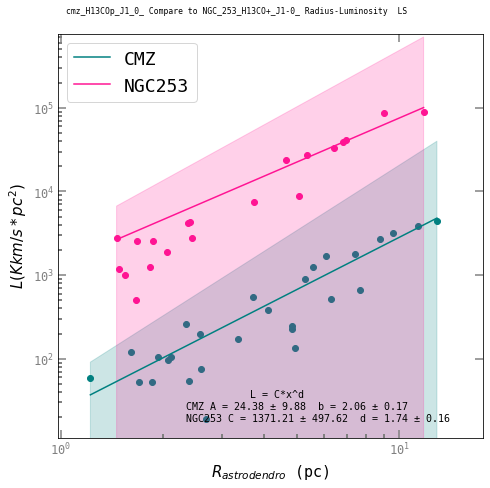

input data is of type linear fitting to powerlaw...
6.044004254266891 724.2711888304959 1.0126452542938074 0.018879234146835122
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.0023658941389706 295.5878897768612
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.0023658941389706, 0.02076172443029089] [295.5878897768612, 12457.20738694888] 2.77425963615689 33.061864964345475
[[1.99794671 3.71023   ]
 [1.99794671 3.71023   ]
 [1.99794671 3.71023   ]
 ...
 [2.         9.99999977]
 [2.         9.99999977]
 [2.         9.99999977]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   2.002366  2.774260  2.000000
a-  0.020762            0.000000
a+  0.020762            0.000000
c 295.587890 33.061865 10.000000
c-12457.207387            0.000000
c+12457.207387            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0023658941389706 0.14408929325349226 3.8927424494765784e+297 1.056686179206147e+151 3.8715937211655513e+295
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999878223518 9.550941782896602e-05 999999315509.3123 999999.0028753077 9999993435.493647
Using Least Squares fit min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  295.5878897768612  +-  111.61186042239812 , b =  2.0023658941389706  +-  0.14408929325349226

Structures plotted:  44

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   2.010035  2.177280  2.000000
a-  0.014394            0.000000
a+  0.014394            0.000000
c 5690.2208493569.452552 10.000000
c-2703392.797984            0.000000
c+2703392.797984            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.0100354693282174 0.11997415240311328 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999989389283 2.825306138663486e-05 999999939815.9678 999999.9112916986 9999999422.591755
NGC253 fit params and covariance error: C =  5690.220848744309  +-  1644.19974394339 , d =  2.0100354693282174  +-  0.11997415240311328

Structures plotted:  55



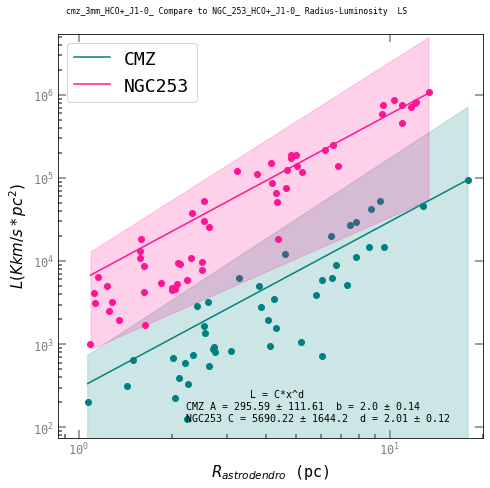

input data is of type linear fitting to powerlaw...
2.9330338868678623 652.023250994622 0.945502247687858 0.038324690254256805
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.21157439853033 918.1931916237522
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.21157439853033, 0.009903489063647266] [918.1931916237522, 55000.4493946078] 2.925323326240544 65.11150374265326
[[ 1.65475365  7.54497242]
 [ 1.65475365  7.54497242]
 [ 1.65475365  7.54497242]
 ...
 [ 2.         10.        ]
 [ 2.         10.        ]
 [ 2.         10.        ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   2.211574  2.925323  2.000000
a-  0.009903            0.000000
a+  0.009903            0.000000
c 918.193192 65.111504 10.000000
c-55000.449395            0.000000
c+55000.449395            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.21157439853033 0.09951627537065114 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999998752873 9.737917390956788e-06 999999992990.3815 999999.9894204228 9999999932.77543
Using Least Squares fit min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  918.1931916237522  +-  234.52174610173745 , b =  2.21157439853033  +-  0.09951627537065114

Structures plotted:  1206

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.307427481621509 1436.9320617833282 0.8472444212648251 0.0278396775385

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   3.105308  4.977765  2.000000
a-  0.014082            0.000000
a+  0.014082            0.000000
c 1195.725171  7.366988 10.000000
c-127086.287286            0.000000
c+127086.287286            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 3.105307701716236 0.11866627883448279 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999253921 7.474978554038458e-06 999999995749.9314 999999.9936031473 9999999959.217224
NGC253 fit params and covariance error: C =  1195.725170617921  +-  356.4916370485054 , d =  3.105307701716236  +-  0.11866627883448279

Structures plotted:  583



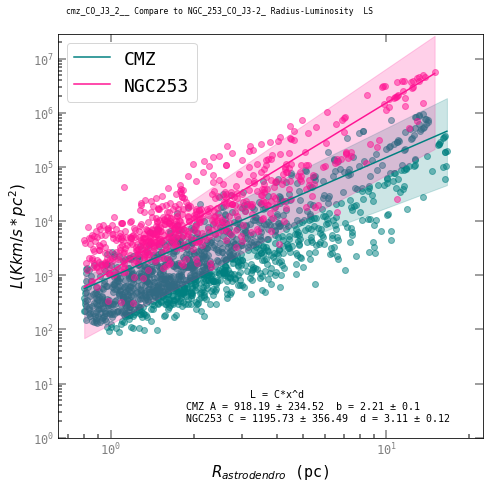

input data is of type linear fitting to powerlaw...
20.604951372863326 22576.824693018218 2.8660503902850616 0.3946986262566051
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.9109508830740496 77.37455589677201
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.9109508830740496, 0.07670046867460831] [77.37455589677201, 8192.129650770987] 2.0933271763999737 211.03434880246206
[[ 1.9737528   5.23517059]
 [ 1.9737528   5.23517059]
 [ 1.97224085  5.91736151]
 ...
 [ 2.         10.        ]
 [ 2.         10.        ]
 [ 2.         10.        ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   2.910951  2.093327  2.000000
a-  0.076700            0.000000
a+  0.076700            0.000000
c  77.374556211.034349 10.000000
c-8192.129651            0.000000
c+8192.129651            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.9109508830740496 0.27694849462419596 1.9297754620120533e+80 1.907917725140909e+42 2.3689500127880835e+77
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999988678 9.260325395041316e-07 999999999886.8263 999999.9998207142 9999999998.894333
Using Least Squares fit min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  77.37455589677201  +-  90.51038421513294 , b =  2.9109508830740496  +-  0.27694849462419596

Structures plotted:  177

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
16.2097808433082

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.864211  2.953713  2.000000
a-  0.003399            0.000000
a+  0.003399            0.000000
c 35270.907379181.420328 10.000000
c-98311439.583473            0.000000
c+98311439.583473            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8642105137614855 0.05830141140609241 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999999598 1.6858739404357614e-07 999999999995.6863 999999.9999931304 9999999999.957788
NGC253 fit params and covariance error: C =  35270.90737944341  +-  9915.212533449452 , d =  1.8642105137614855  +-  0.05830141140609241

Structures plotted:  180



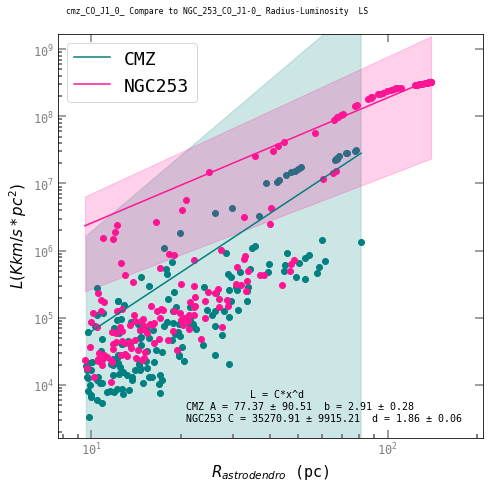

input data is of type linear fitting to powerlaw...
2.456587764360523 92.4288455840106 1.2577741157489633 0.09218498776152229
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.974090288243343 10.039652196502628
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.974090288243343, 0.08807249659703127] [10.039652196502628, 36.29203882297278] 2.784955199020316 14.143512404565845
[[1.90595636 8.02001263]
 [1.90595636 8.02001263]
 [1.95650756 8.58622131]
 ...
 [1.99999958 9.99999464]
 [1.99999955 9.99999347]
 [1.99999969 9.99999189]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   2.974090  2.784955  2.000000
a-  0.088072            0.000000
a+  0.088072            0.000001
c  10.039652 14.143512  9.999993
c- 36.292039            0.000005
c+ 36.292039            0.000012



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.974090288243343 0.29677010731714754 10321492105937.215 29368746.426833175 10956004362.292612
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999996391312163 0.0005191776123030957 999983935761.8713 999976.9473997687 9999847666.799501
Using Least Squares fit min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  10.039652196502628  +-  6.024287412049062 , b =  2.974090288243343  +-  0.29677010731714754

Structures plotted:  28

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.275117448317318 27636.999630

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   2.485784  2.774071  2.000000
a-  0.046021            0.000000
a+  0.046021            0.000000
c 354.942476193.093029  9.999999
c-23379.804184            0.000001
c+23379.804184            0.000002



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4857838353227373 0.21452535115056617 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.99999992683996 0.0002340960348934039 999996689033.655 999995.3263416573 9999968574.90329
NGC253 fit params and covariance error: C =  354.9424756229356  +-  152.90455906895386 , d =  2.4857838353227373  +-  0.21452535115056617

Structures plotted:  13



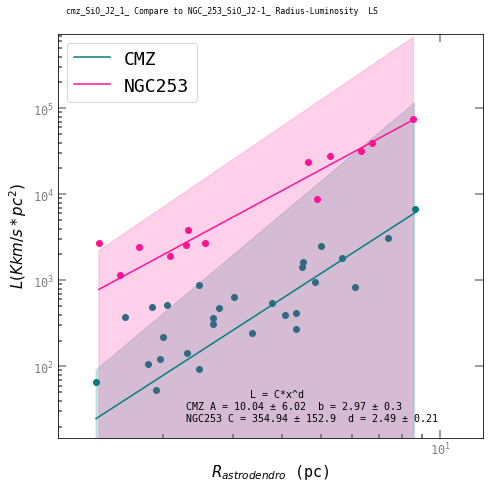

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 97.06831198986582 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.509747477891824 25.173674730493545
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.509747477891824, 0.05108402510942389] [25.173674730493545, 160.79969814891513] 2.927933296368625 8.796799817365843
[[1.69033555 7.74338029]
 [1.69033555 7.74338029]
 [1.69033555 7.74338029]
 ...
 [1.99999986 9.99999406]
 [1.9999999  9.99999474]
 [1.99999989 9.99999429]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.509747  2.927933  2.000000
a-  0.051084            0.000000
a+  0.051084            0.000000
c  25.173675  8.796800  9.999997
c-160.799698            0.000002
c+160.799698            0.000005



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.509747477891824 0.2260177539695143 4.82416560991526e+27 1336477261212130.0 1.491676783789159e+25
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998565224442 0.00032932934150075964 999992700497.4113 999989.8436374074 9999930308.643356
Using Least Squares fit min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Radius-Luminosity  LS

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 4646.9761645009385 6.969209033683409 0.017490196169355682
masking bad values ...
restricting fit to [None, None] ...

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   1.462255  2.692560  1.999997
a-  0.831826            0.000002
a+  0.831826            0.000005
c 3579.277250703.958375  9.999974
c-10732201.098308            0.000019
c+10732201.098308            0.000047



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.4622545475396915 0.9120452065248159 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999974767572293 0.0013784314337068934 999935124146.11 999907.6768656755 9999409337.672493
NGC253 fit params and covariance error: C =  3579.2772501388336  +-  3276.0038306308197 , d =  1.4622545475396915  +-  0.9120452065248159

Structures plotted:  11



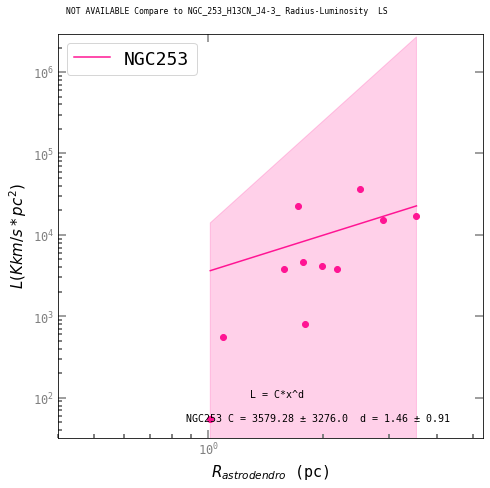

input data is of type linear fitting to powerlaw...
2.127798493004818 131.21015994627908 2.108629364314519 0.01725345592894409
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.1168403204083996 332.273986487262
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.1168403204083996, 0.006552463389796892] [332.273986487262, 3463.475604250481] 2.7656883920631383 72.08974860141387
[[1.92479396 9.94642491]
 [1.92479396 9.94642491]
 [1.92479396 9.94642491]
 ...
 [1.99999994 9.99999988]
 [1.99999994 9.99999988]
 [1.99999994 9.99999988]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   2.116840  2.765688  2.000000
a-  0.006552            0.000000
a+  0.006552            0.000000
c 332.273986 72.089749 10.000000
c-3463.475604            0.000000
c+3463.475604            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.1168403204083996 0.08094728772353582 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999797746828 0.000123445793563397 999998990023.5608 999998.533352471 9999990365.940287
Using Least Squares fit min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Radius-Luminosity  LS

CMZ fit params and covariance error: a =  332.273986487262  +-  58.85130078639283 , b =  2.1168403204083996  +-  0.08094728772353582

Structures plotted:  145

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.296472346657536 489.050677354645 0.6678574983476026 0.026301276472242906

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   2.294983  2.408621  2.000000
a-  0.022149            0.000000
a+  0.022149            0.000000
c 2912.8748452180.599122 10.000000
c-1030601.722871            0.000000
c+1030601.722871            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.294982752708873 0.14882469870972714 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999953673706 5.919127248222064e-05 999999758917.8629 999999.6497014656 9999997695.848839
NGC253 fit params and covariance error: C =  2912.8748447060407  +-  1015.1855608067611 , d =  2.294982752708873  +-  0.14882469870972714

Structures plotted:  42



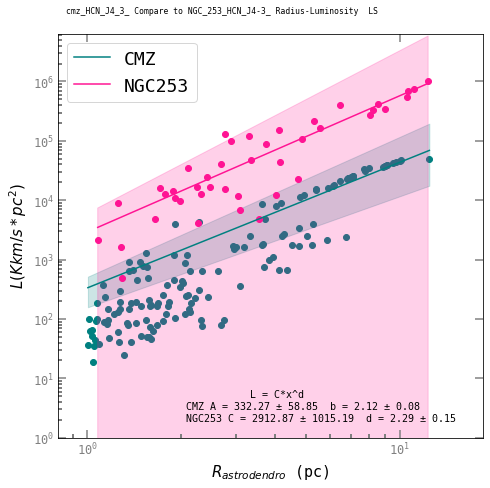

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 97.06831198986582 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.509747477891824 25.173674730493545
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.509747477891824, 0.05108402510942389] [25.173674730493545, 160.79969814891513] 2.927933296368625 8.796799817365843
[[1.92768495 4.8991701 ]
 [1.94550109 5.85015963]
 [1.94550109 5.85015963]
 ...
 [1.99999998 9.99999588]
 [1.99999998 9.99999588]
 [1.99999998 9.99999588]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.509747  2.927933  2.000000
a-  0.051084            0.000000
a+  0.051084            0.000000
c  25.173675  8.796800  9.999997
c-160.799698            0.000002
c+160.799698            0.000006



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.509747477891824 0.2260177539695143 4.82416560991526e+27 1336477261212130.0 1.491676783789159e+25
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999857193102 0.00032763108228106103 999992553189.7817 999989.6003281291 9999928820.124218
Using Least Squares fit min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Radius-Luminosity  LS

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.0967037285160233 2955.939497114448 3.579715938591389 0.05177202887285892
masking bad values ...
restricting fit to [None, None] ...
le

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   2.338101  2.362983  2.000000
a-  0.031706            0.000000
a+  0.031706            0.000000
c 2842.6992992553.420614 10.000000
c-1385114.281741            0.000000
c+1385114.281741            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3381008528517 0.17806039085247544 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999965020454 5.140501072464701e-05 999999819096.7915 999999.7289765367 9999998271.511282
NGC253 fit params and covariance error: C =  2842.699298565412  +-  1176.9087822514982 , d =  2.3381008528517  +-  0.17806039085247544

Structures plotted:  43



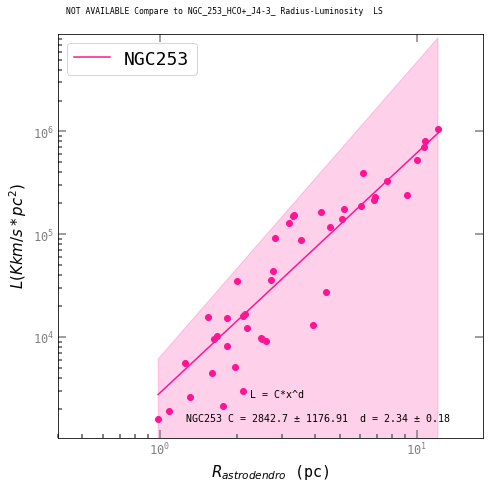

In [29]:
# Make plots:

CMZ_names = File_Descriptors_cmz#[5]
NGC_names = File_Descriptors_NGC#[5]
MCMC=False
ls=True
use_manual_error_v=True
use_manual_error_r=True
fit_results_cmz = [[],[]]
fit_results_ngc = [[],[]]
'''
    "NGC_253_H13CN_J1-0_",
    "NGC_253_HCN_J1-0_",
    "NGC_253_H13CO+_J1-0_",
    "NGC_253_HCO+_J1-0_",
    "NGC_253_CO_J3-2_",
    "NGC_253_CO_J1-0_",
    "NGC_253_SiO_J2-1_",
    "NGC_253_H13CN_J4-3_",
    "NGC_253_HCN_J4-3_",
    "NGC_253_HCO+_J4-3_"
'''
min_rs = [1,1,1,1,.8,9.5,1,1,1,.9] #pc CO 10 should be 32? CO 32 should be .8 or 1?
max_rs = [9999,9999,9999,9999,9999,9999,99999,9999,9999,99999]
#manual errors:
r_errs=[.1,.1,.1,.1,.1,1,.1,.1,.1,.1] #pc 1/5 of the beam
v_errs=[.5,.5,.5,.5,.5,1,.5,.5,.5,.5,] # i didnt calculate L errors
############################################################


#make a meta function for doing the plots of leaves and branches and stuff
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="All",save_name="LS",fs=8,plot_errors=False,ls=14,figsize=(8,8))

['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
2.3772124338612706 97.06831198986582 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.666895094761194 49.630565721981945
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.666895094761194, 0.06510669352864921] [49.630565721981945, 326.8815263437787] 1.8388750447852873 38.74696078505852
[[1.79763118 2.96646417]
 [1.66490549 5.05405434]
 [1.65898208 6.71420632]
 ...
 [1.99999965 9.99999093]
 [1.99

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   1.666895  1.838875  1.999998
a-  0.065107            0.000002
a+  0.065107            0.000004
c  49.630566 38.746961  9.999972
c-326.881526            0.000021
c+326.881526            0.000050



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.666895094761194 0.2551601331098752 1.9836306800820525e+51 1.2218937562859898e+27 4.2713555316809234e+49
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999997929759544 0.0012478731354455472 999930682810.8618 999903.116383362 9999354493.96607
Using Least Squares fit min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  49.630565721981945  +-  18.07986521918177 , b =  1.666895094761194  +-  0.2551601331098752

Structures plotted:  42

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.227963141

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   1.780687  2.093183  2.000000
a-  0.086357            0.000000
a+  0.086357            0.000001
c 1501.202676816.584329  9.999994
c-706766.450835            0.000004
c+706766.450835            0.000011



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.7806874505652786 0.29386488487703327 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999996221032794 0.0005335792725579867 999985565754.8097 999979.5912589948 9999864358.81984
NGC253 fit params and covariance error: C =  1501.2026755810493  +-  840.6940292606674 , d =  1.7806874505652786  +-  0.29386488487703327

Structures plotted:  11



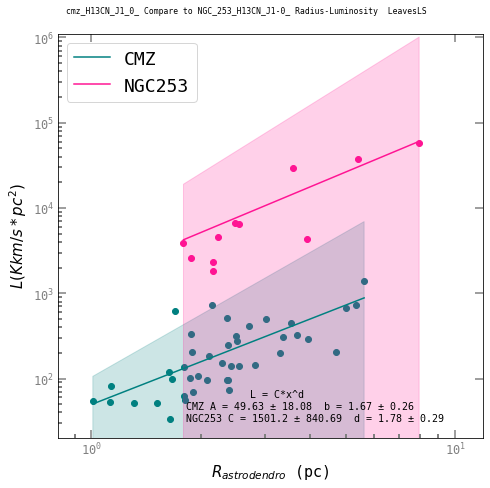

input data is of type linear fitting to powerlaw...
2.533431136416782 562.5066824035249 2.2458997491321253 0.002200446276190057
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.408714283084834 323.75346239439455
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.408714283084834, 0.058822908231965475] [323.75346239439455, 10136.052449192262] 2.2287274301314772 92.21035141020099
[[1.92413485 4.65760875]
 [1.92413485 4.65760875]
 [1.92413485 4.65760875]
 ...
 [1.99999954 9.99999915]
 [1.99999954 9.99999915]
 [1.99999954 9.99999915]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   1.408714  2.228727  2.000000
a-  0.058823            0.000000
a+  0.058823            0.000000
c 323.753462 92.210351  9.999997
c-10136.052449            0.000002
c+10136.052449            0.000005



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.408714283084834 0.2425343444379898 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998019494027 0.00038644856511942495 999993695619.8636 999991.2148105879 9999941516.454456
Using Least Squares fit min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  323.75346239439455  +-  100.67796406956322 , b =  1.408714283084834  +-  0.2425343444379898

Structures plotted:  104

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.8855319046669567 2974.2041206665062 2.5555150585875923 0.01386

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   2.450751  2.681868  2.000000
a-  0.086907            0.000000
a+  0.086907            0.000000
c 2669.9940591850.329526  9.999999
c-1389062.719131            0.000001
c+1389062.719131            0.000002



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4507514333940885 0.29479928692650237 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999088091849 0.0002627829079710216 999997318287.6013 999996.1636308673 9999975282.616718
NGC253 fit params and covariance error: C =  2669.9940589609264  +-  1178.5850495959999 , d =  2.4507514333940885  +-  0.29479928692650237

Structures plotted:  29



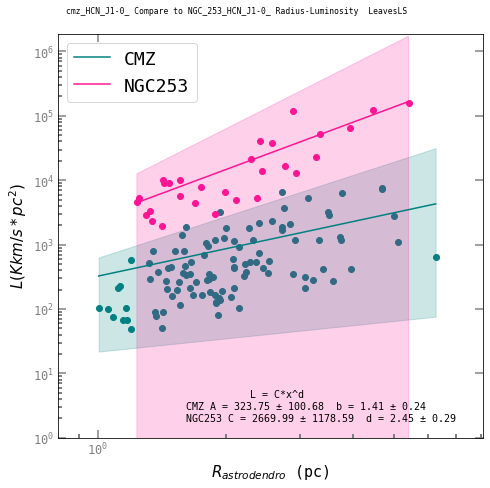

input data is of type linear fitting to powerlaw...
6.2773702492551795 519.4517452566075 2.0382323662032324 0.09729476048125324
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.516669946829606 36.949137311315035
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.516669946829606, 0.18220514890304462] [36.949137311315035, 762.4746400513151] 1.667874022169188 23.70242719666822
[[1.9322416  4.81777166]
 [1.9322416  4.81777166]
 [1.9322416  4.81777166]
 ...
 [1.99999761 9.99994229]
 [1.99999696 9.99994697]
 [1.99999767 9.99994189]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   1.516670  1.667874  1.999996
a-  0.182205            0.000003
a+  0.182205            0.000008
c  36.949137 23.702427  9.999921
c-762.474640            0.000059
c+762.474640            0.000139



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.516669946829606 0.42685495066010964 2.922854913723782e+38 7.163482123154213e+20 8.894823019018862e+36
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999955159904288 0.0018394779601748849 999808555116.7097 999735.188724836 9998188780.069633
Using Least Squares fit min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  36.949137311315035  +-  27.61294334277523 , b =  1.516669946829606  +-  0.42685495066010964

Structures plotted:  19

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.83846

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   2.497542  2.576902  1.999999
a-  0.016080            0.000000
a+  0.016080            0.000001
c 419.956627367.048476  9.999991
c-7475.524415            0.000006
c+7475.524415            0.000016



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.4975420560314228 0.1268083956668671 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999993686961504 0.0006890172140902599 999978910296.3749 999969.8653145264 9999803638.97608
NGC253 fit params and covariance error: C =  419.9566266579352  +-  86.46111504528712 , d =  2.4975420560314228  +-  0.1268083956668671

Structures plotted:  12



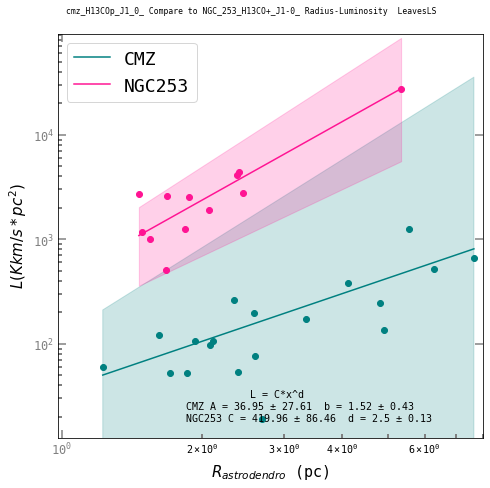

input data is of type linear fitting to powerlaw...
6.044004254266891 724.2711888304959 1.0126452542938074 0.018879234146835122
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.550677728553523 54.49443498690439
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.550677728553523, 0.13687618483744102] [54.49443498690439, 1557.8935005807864] 4.0192197560051195 2.468244366851035
[[1.71155132 7.0683165 ]
 [1.71155132 7.0683165 ]
 [1.71982123 7.25393169]
 ...
 [1.99999997 9.99999807]
 [1.99999996 9.99999795]
 [1.99999996 9.99999795]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   2.550678  4.019220  2.000000
a-  0.136876            0.000000
a+  0.136876            0.000000
c  54.494435  2.468244  9.999999
c-1557.893501            0.000001
c+1557.893501            0.000002



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.550677728553523 0.3699678159481457 1.109462724452183e+57 1.9949549166604945e+30 3.1220150112599306e+54
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999331795109 0.00022384998048915035 999997003345.1338 999995.572244711 9999971572.045467
Using Least Squares fit min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  54.49443498690439  +-  39.47015962193194 , b =  2.550677728553523  +-  0.3699678159481457

Structures plotted:  31

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.3

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   2.022778  2.318958  2.000000
a-  0.122352            0.000000
a+  0.122352            0.000000
c 4060.9724342250.842934  9.999999
c-4046739.914425            0.000001
c+4046739.914425            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.022778386743229 0.349788939552659 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999389609489 0.00021350595710078807 999998188312.2222 999997.388892614 9999983288.595867
NGC253 fit params and covariance error: C =  4060.9724343999496  +-  2011.651041911874 , d =  2.022778386743229  +-  0.349788939552659

Structures plotted:  34



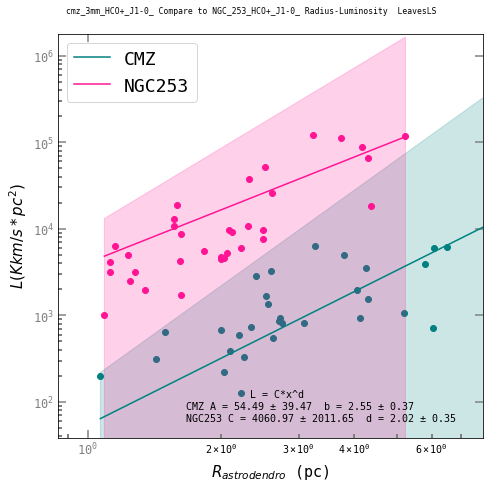

input data is of type linear fitting to powerlaw...
2.9330338868678623 652.023250994622 0.945502247687858 0.038324690254256805
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 0.9853299656582338 978.5146666913708
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [0.9853299656582338, 0.007407446743678901] [978.5146666913708, 10770.317313403979] 1.1005197832885956 580.1238596154244
[[1.97230311 5.5688587 ]
 [1.97230311 5.5688587 ]
 [1.96750924 6.57950239]
 ...
 [2.         9.99999972]
 [2.         9.9999998 ]
 [2.         9.99999986]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   0.985330  1.100520  2.000000
a-  0.007407            0.000000
a+  0.007407            0.000000
c 978.514667580.123860 10.000000
c-10770.317313            0.000000
c+10770.317313            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9853299656582338 0.08606652510517025 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999951368381 6.0853401417992516e-05 999999826849.4883 999999.745484185 9999998380.473305
Using Least Squares fit min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  978.5146666913708  +-  103.7801393013325 , b =  0.9853299656582338  +-  0.08606652510517025

Structures plotted:  881

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.307427481621509 1436.9320617833282 0.8472444212648251 0.0278

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   1.138977  1.047595  2.000000
a-  0.008197            0.000000
a+  0.008197            0.000000
c 8017.0503385085.572099 10.000000
c-867646.621682            0.000000
c+867646.621682            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.1389768320725369 0.09053829737549722 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999996707781 4.990746817586396e-05 999999890198.4302 999999.839482973 9999998977.790436
NGC253 fit params and covariance error: C =  8017.050337867616  +-  931.4755078273555 , d =  1.1389768320725369  +-  0.09053829737549722

Structures plotted:  464



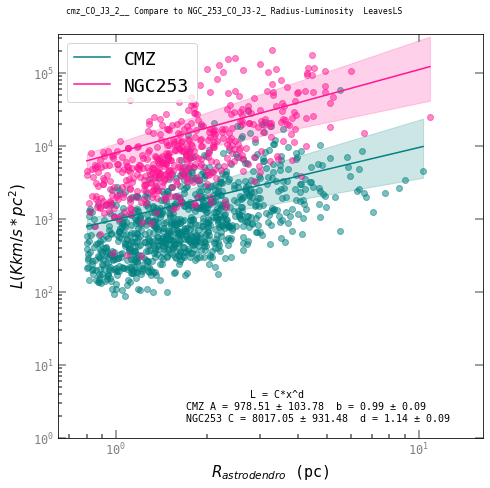

input data is of type linear fitting to powerlaw...
20.604951372863326 22576.824693018218 2.8660503902850616 0.3946986262566051
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.5684162138953792 1088.8525289818458
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.5684162138953792, 0.17318162229075243] [1088.8525289818458, 1892252.8607078784] 2.57796635656483 38.204912723314294
[[ 1.74431645  3.76939944]
 [ 1.74431645  3.76939944]
 [ 1.74431645  3.76939944]
 ...
 [ 2.         10.        ]
 [ 2.         10.        ]
 [ 2.         10.        ]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   1.568416  2.577966  2.000000
a-  0.173182            0.000000
a+  0.173182            0.000000
c 1088.852529 38.204913 10.000000
c-1892252.860708            0.000000
c+1892252.860708            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.5684162138953792 0.41615096093935966 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999986096 3.2420215018921887e-06 999999998968.2675 999999.9984375763 9999999990.002825
Using Least Squares fit min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  1088.8525289818458  +-  1375.5918219834975 , b =  1.5684162138953792  +-  0.41615096093935966

Structures plotted:  112

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
16.209780843308277 41955.45764173808 6.101885615930488 0.

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.398060  2.226024  2.000000
a-  0.634113            0.000000
a+  0.634113            0.000000
c 7279.174789255.278605 10.000000
c-347550986.618860            0.000000
c+347550986.618860            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.3980598645379163 0.7963121401799138 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999884424 2.946438521903838e-06 999999999118.353 999999.9986175179 9999999991.449656
NGC253 fit params and covariance error: C =  7279.174788928457  +-  18642.719399778016 , d =  1.3980598645379163  +-  0.7963121401799138

Structures plotted:  101



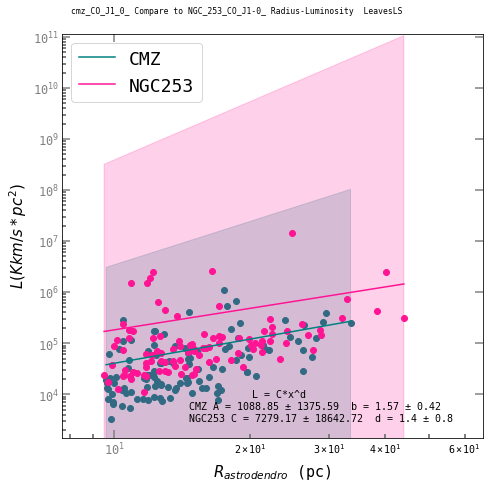

input data is of type linear fitting to powerlaw...
2.456587764360523 92.4288455840106 1.2577741157489633 0.09218498776152229
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.445956604504297 85.12904677558053
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.445956604504297, 0.12476305238855705] [85.12904677558053, 2044.8666172732542] 1.9791317466160196 38.790030949130234
[[1.81440153 7.09995436]
 [1.81501957 7.10863017]
 [1.86073546 7.18637591]
 ...
 [1.99999822 9.99998228]
 [1.99999822 9.99998228]
 [1.99999886 9.99999448]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   1.445957  1.979132  1.999998
a-  0.124763            0.000001
a+  0.124763            0.000003
c  85.129047 38.790031  9.999976
c-2044.866617            0.000018
c+2044.866617            0.000044



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.445956604504297 0.3532181371172169 3.758403294171429e+86 1.3302768314605732e+45 1.346005317421392e+85
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999983362427773 0.001124526092780809 999941352719.3433 999917.1853053432 9999451834.445858
Using Least Squares fit min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  85.12904677558053  +-  45.22020142893278 , b =  1.445956604504297  +-  0.3532181371172169

Structures plotted:  23

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.27511744831731

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   2.540818  2.644465  1.999999
a-  0.060864            0.000000
a+  0.060864            0.000001
c 426.247697350.976770  9.999993
c-28103.217192            0.000005
c+28103.217192            0.000013



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.540818051273951 0.24670661253306667 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999994944253545 0.0006186459200232026 999982443225.4941 999975.1513272622 9999836073.343754
NGC253 fit params and covariance error: C =  426.24769697217255  +-  167.64014194731718 , d =  2.540818051273951  +-  0.24670661253306667

Structures plotted:  9



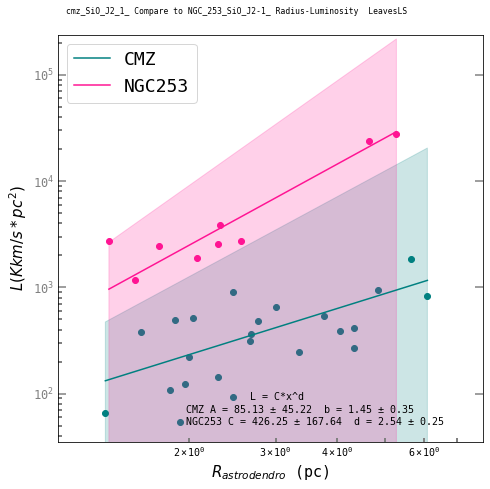

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 97.06831198986582 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.666895094761194 49.630565721981945
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.666895094761194, 0.06510669352864921] [49.630565721981945, 326.8815263437787] 1.8388750447852873 38.74696078505852
[[1.85608523 6.90928315]
 [1.85214457 7.18149844]
 [1.84877463 7.23979959]
 ...
 [1.9999995  9.99999279]
 [1.9999995  9.99999279]
 [1.99999897 9.99998763]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   1.666895  1.838875  1.999998
a-  0.065107            0.000002
a+  0.065107            0.000004
c  49.630566 38.746961  9.999973
c-326.881526            0.000020
c+326.881526            0.000048



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.666895094761194 0.2551601331098752 1.9836306800820525e+51 1.2218937562859898e+27 4.2713555316809234e+49
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999979618105677 0.0012374620133848925 999932782839.4893 999907.3770191103 9999374756.396477
Using Least Squares fit min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Radius-Luminosity  LeavesLS

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.7769403699430149 4646.9761645009385 6.969209033683409 0.017490196169355682
masking bad values ...
restricting fit to [Non

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a   1.803737  3.459596  1.999993
a-  1.883035            0.000005
a+  1.883035            0.000012
c 2080.176777390.619823  9.999947
c-5891913.701139            0.000040
c+5891913.701139            0.000094



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8037370546983842 1.372237160872362 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999931382099683 0.0022823551145230775 999862559400.3279 999808.9681869177 9998783572.090258
NGC253 fit params and covariance error: C =  2080.176777172174  +-  2427.32645129144 , d =  1.8037370546983842  +-  1.372237160872362

Structures plotted:  9



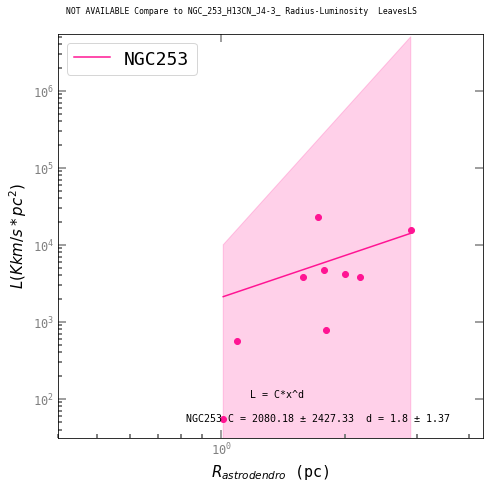

input data is of type linear fitting to powerlaw...
2.127798493004818 131.21015994627908 2.108629364314519 0.01725345592894409
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.08760910474571 102.78303772165587
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.08760910474571, 0.7404665164271544] [102.78303772165587, 3630.6486856112306] 1.8634471806925215 87.0506580931088
[[1.38799247 9.66166047]
 [1.38799247 9.66166047]
 [1.38799247 9.66166047]
 ...
 [1.99999393 9.99999557]
 [1.99999393 9.99999557]
 [1.99999393 9.99999557]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   2.087609  1.863447  1.999992
a-  0.740467            0.000006
a+  0.740467            0.000014
c 102.783038 87.050658  9.999959
c-3630.648686            0.000030
c+3630.648686            0.000075



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.08760910474571 0.8605036411469474 7.424151512401174e+104 2.491284784667868e+54 6.067890313702893e+102
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999924047453468 0.002392672709825811 999888624115.4849 999842.7464364496 9999061110.407167
Using Least Squares fit min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Radius-Luminosity  LeavesLS

CMZ fit params and covariance error: a =  102.78303772165587  +-  60.25486441451205 , b =  2.08760910474571  +-  0.8605036411469474

Structures plotted:  75

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
1.29647234665753

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   1.295773  2.243687  2.000000
a-  0.378227            0.000000
a+  0.378227            0.000000
c 8713.7349061902.351376  9.999998
c-46118325.120781            0.000001
c+46118325.120781            0.000003



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.2957731060500057 0.615001829408825 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998694120231 0.0003142270239992886 999995914110.8354 999994.268416186 9999962147.99581
NGC253 fit params and covariance error: C =  8713.734905857982  +-  6791.047424424384 , d =  1.2957731060500057  +-  0.615001829408825

Structures plotted:  26



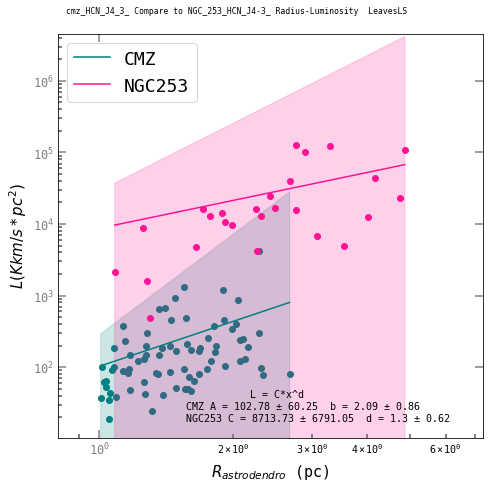

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
2.3772124338612706 97.06831198986582 2.5160789514512194 0.07359434764523617
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.666895094761194 49.630565721981945
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.666895094761194, 0.06510669352864921] [49.630565721981945, 326.8815263437787] 1.8388750447852873 38.74696078505852
[[1.53477058 4.38925843]
 [1.53477058 4.38925843]
 [1.53477058 4.38925843]
 ...
 [1.99999927 9.99999826]
 [1.99999927 9.99999826]
 [1.99999927 9.99999826]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 
plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   1.666895  1.838875  1.999998
a-  0.065107            0.000002
a+  0.065107            0.000004
c  49.630566 38.746961  9.999972
c-326.881526            0.000021
c+326.881526            0.000049



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.666895094761194 0.2551601331098752 1.9836306800820525e+51 1.2218937562859898e+27 4.2713555316809234e+49
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999997991508574 0.0012285823641544106 999931626782.585 999905.3728766664 9999362511.99488
Using Least Squares fit min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Radius-Luminosity  LeavesLS

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.0967037285160233 2955.939497114448 3.579715938591389 0.05177202887285892
masking bad values ...
restricting fit to [None, No

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   1.505879  1.940732  2.000000
a-  0.042095            0.000000
a+  0.042095            0.000000
c 8560.9505613293.544602  9.999999
c-11201463.268905            0.000001
c+11201463.268905            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.505878733813213 0.2051700788640064 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999955348768 0.00018299804956374357 999998202329.4624 999997.3638046689 9999983051.425442
NGC253 fit params and covariance error: C =  8560.950561374339  +-  3346.8587166034936 , d =  1.505878733813213  +-  0.2051700788640064

Structures plotted:  27



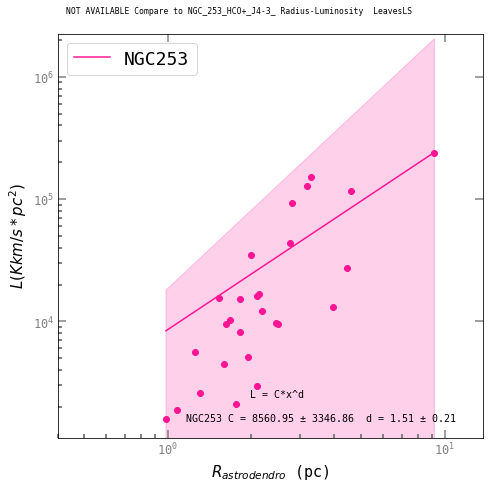

In [30]:
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Leaves",save_name="LS",fs=8,plot_errors=False)

['NGC_253_H13CN_J1-0_', 'NGC_253_HCN_J1-0_', 'NGC_253_H13CO+_J1-0_', 'NGC_253_HCO+_J1-0_', 'NGC_253_CO_J3-2_', 'NGC_253_CO_J1-0_', 'NGC_253_SiO_J2-1_', 'NGC_253_H13CN_J4-3_', 'NGC_253_HCN_J4-3_', 'NGC_253_HCO+_J4-3_'] ['cmz_H13CN_J1_0_', 'cmz_HCN_J1-0_', 'cmz_H13COp_J1_0_', 'cmz_3mm_HCO+_J1-0_', 'cmz_CO_J3_2__', 'cmz_CO_J1_0_', 'cmz_SiO_J2_1_', 'NOT AVAILABLE', 'cmz_HCN_J4_3_', 'NOT AVAILABLE']
input data is of type linear fitting to powerlaw...
7.724598111313055 1146.8138574781165 4.748336844220261 0.025805452356985528
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.3078818670174583 40.34341489113237
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.3078818670174583, 0.23732979098320986] [40.34341489113237, 1924.1282296603313] 2.8338963151886234 11.009271980800728
[[1.65170715 4.96985567]
 [1.69653112 4.72576263]
 [1.69653112 4.72576263]
 ...
 [1.99999961 9.99999954]
 [1.

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13CN_J1_0_
    least sq  max like      MCMC
a   2.307882  2.833896  2.000000
a-  0.237330            0.000000
a+  0.237330            0.000000
c  40.343415 11.009272  9.999997
c-1924.128230            0.000003
c+1924.128230            0.000006



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3078818670174583 0.4871650551745372 4.480193360991726e+42 1.4088774913067024e+23 2.205031973028944e+40
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998449618517 0.00034084431761739645 999991911618.0153 999988.7952824258 9999922686.037207
Using Least Squares fit min r = 1

cmz_H13CN_J1_0_ Compare to NGC_253_H13CN_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  40.34341489113237  +-  43.864886066879635 , b =  2.3078818670174583  +-  0.4871650551745372

Structures plotted:  16

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
9.0

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J1-0_
    least sq  max like      MCMC
a   0.936766  0.990570  2.000000
a-  0.192502            0.000000
a+  0.192502            0.000000
c 12961.79256310985.704977  9.999999
c-163055061.331780            0.000001
c+163055061.331780            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 0.9367661952187444 0.4387508491072594 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999642524393 0.00016314604911490425 999998108987.2789 999997.2786203306 9999981912.98927
NGC253 fit params and covariance error: C =  12961.792563351444  +-  12769.301520904744 , d =  0.9367661952187444  +-  0.4387508491072594

Structures plotted:  4



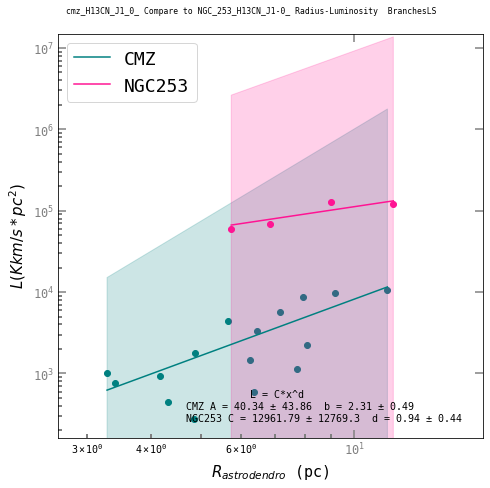

input data is of type linear fitting to powerlaw...
8.061749043027628 2614.9321714905636 4.518215127402175 0.02620902373895684
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.2777729493463097 281.82812014642764
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.2777729493463097, 0.07816965661813165] [281.82812014642764, 34203.41783007537] 3.301868347574949 17.74758532201264
[[1.98858356 8.38992801]
 [1.98858356 8.38992801]
 [1.98858356 8.38992801]
 ...
 [2.         9.99999928]
 [2.         9.99999916]
 [2.         9.99999908]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J1-0_
    least sq  max like      MCMC
a   2.277773  3.301868  2.000000
a-  0.078170            0.000000
a+  0.078170            0.000000
c 281.828120 17.747585 10.000000
c-34203.417830            0.000000
c+34203.417830            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2777729493463097 0.2795883699622208 1.2761246443096035e+284 3.170218128682629e+144 6.731628592636338e+281
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999889499716 9.102339888964873e-05 999999433477.7178 999999.1680475138 9999994589.213345
Using Least Squares fit min r = 1

cmz_HCN_J1-0_ Compare to NGC_253_HCN_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  281.82812014642764  +-  184.94166061240873 , b =  2.2777729493463097  +-  0.2795883699622208

Structures plotted:  31

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
12.5

mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J1-0_
    least sq  max like      MCMC
a   1.829796  2.070527  2.000000
a-  0.028733            0.000000
a+  0.028733            0.000000
c 10259.1267935361.848138 10.000000
c-18441940.887353            0.000000
c+18441940.887353            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.8297964503870483 0.16950779858509196 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999998390151 3.491380544683276e-05 999999906696.613 999999.8648791864 9999999104.034267
NGC253 fit params and covariance error: C =  10259.126793204503  +-  4294.408095110793 , d =  1.8297964503870483  +-  0.16950779858509196

Structures plotted:  20



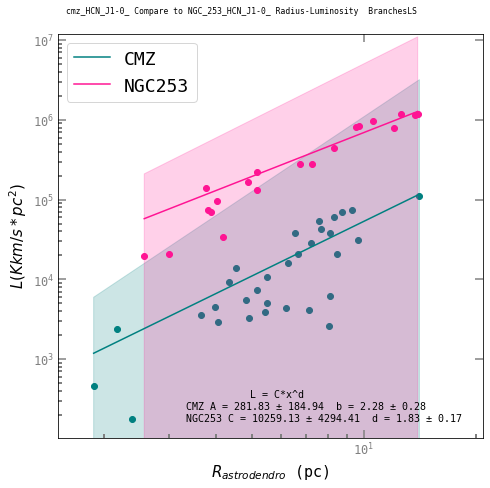

input data is of type linear fitting to powerlaw...
12.932496997718696 4383.889370101222 5.692254881860875 0.0358670643952843
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.6535246979873555 68.01401333890293
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.6535246979873555, 0.03476409011239] [68.01401333890293, 897.93561277169] 1.896479022382077 38.461808777963086
[[1.65364736 7.24230646]
 [1.64843937 7.33760152]
 [1.72360244 6.31069599]
 ...
 [1.99999975 9.99999559]
 [1.99999987 9.99999894]
 [1.99999987 9.99999894]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_H13COp_J1_0_
    least sq  max like      MCMC
a   1.653525  1.896479  1.999999
a-  0.034764            0.000000
a+  0.034764            0.000001
c  68.014013 38.461809  9.999988
c-897.935613            0.000009
c+897.935613            0.000022



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6535246979873555 0.18645130761780673 4.6509110853951554e+69 3.100983540804907e+36 1.0327931264400407e+68
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999994609878653 0.0006392561307283516 999971393376.8905 999959.6839759282 9999726344.634626
Using Least Squares fit min r = 1

cmz_H13COp_J1_0_ Compare to NGC_253_H13CO+_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  68.01401333890293  +-  29.96557379346656 , b =  1.6535246979873555  +-  0.18645130761780673

Structures plotted:  9

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8.

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CO+_J1-0_
    least sq  max like      MCMC
a   1.674183  2.017345  2.000000
a-  0.102645            0.000000
a+  0.102645            0.000000
c 1593.169029688.637373  9.999999
c-1313831.815273            0.000000
c+1313831.815273            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.6741828617948709 0.3203823822121792 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999716491548 0.00014669256034484528 999998440369.1964 999997.7711893916 9999985056.493303
NGC253 fit params and covariance error: C =  1593.1690292630517  +-  1146.2250282003185 , d =  1.6741828617948709  +-  0.3203823822121792

Structures plotted:  8



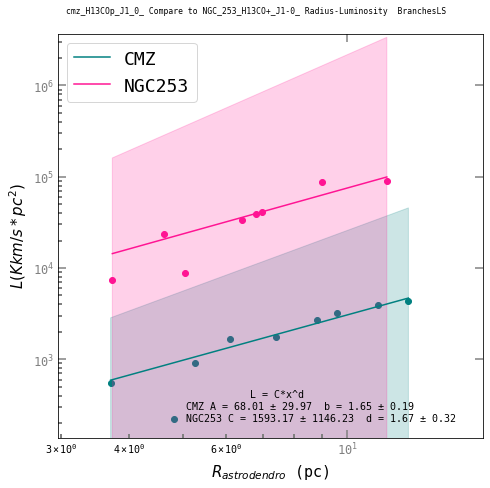

input data is of type linear fitting to powerlaw...
9.635270458584806 14755.449821173665 4.646759832183447 0.007394452106944356
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 1.7208715862988675 645.4036936442361
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [1.7208715862988675, 0.06902651361850681] [645.4036936442361, 195967.53360729036] 2.4822509678703266 74.45564238639527
[[1.84968355 5.33622936]
 [1.86102858 5.25107924]
 [1.86102858 5.25107924]
 ...
 [1.99999998 9.99999989]
 [1.99999998 9.99999988]
 [1.99999998 9.99999988]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_3mm_HCO+_J1-0_
    least sq  max like      MCMC
a   1.720872  2.482251  2.000000
a-  0.069027            0.000000
a+  0.069027            0.000000
c 645.403694 74.455642 10.000000
c-195967.533607            0.000000
c+195967.533607            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.7208715862988675 0.26272897369438875 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999858575719 0.00010297433076601403 999999125814.0352 999998.7525282361 9999991583.781513
Using Least Squares fit min r = 1

cmz_3mm_HCO+_J1-0_ Compare to NGC_253_HCO+_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  645.4036936442361  +-  442.6822038520301 , b =  1.7208715862988675  +-  0.26272897369438875

Structures plotted:  13

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
4.651686370380959 76571.00682853888 7.3635930111

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J1-0_
    least sq  max like      MCMC
a   1.909403  2.007929  2.000000
a-  0.046194            0.000000
a+  0.046194            0.000000
c 7282.5042415385.378196 10.000000
c-14264580.518599            0.000000
c+14264580.518599            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9094033103519703 0.21492675102897704 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999989091717 2.8728789553686737e-05 999999935301.7986 999999.9069674668 9999999378.135235
NGC253 fit params and covariance error: C =  7282.504241397456  +-  3776.8479607469903 , d =  1.9094033103519703  +-  0.21492675102897704

Structures plotted:  21



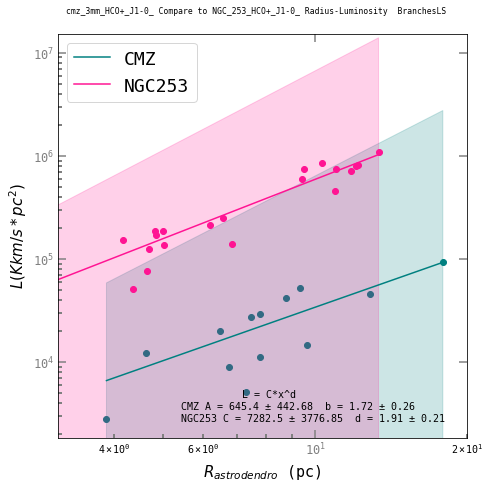

input data is of type linear fitting to powerlaw...
10.157374562991064 13501.67449189022 1.6889795489823505 0.01496503758005658
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.064813919534327 1363.2771800358246
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.064813919534327, 0.038871493498916526] [1363.2771800358246, 474293.1331289026] 2.583045787441876 165.10229507888891
[[ 1.86164479  5.89030852]
 [ 1.86164479  5.89030852]
 [ 1.86164479  5.89030852]
 ...
 [ 2.         10.        ]
 [ 2.         10.        ]
 [ 2.         10.        ]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J3_2__
    least sq  max like      MCMC
a   2.064814  2.583046  2.000000
a-  0.038871            0.000000
a+  0.038871            0.000000
c 1363.277180165.102295 10.000000
c-474293.133129            0.000000
c+474293.133129            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.064813919534327 0.19715854913981418 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999998676532 9.974243376037393e-06 999999992345.9292 999999.9886276823 9999999926.50669
Using Least Squares fit min r = 0.8

cmz_CO_J3_2__ Compare to NGC_253_CO_J3-2_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  1363.2771800358246  +-  688.6894315501746 , b =  2.064813919534327  +-  0.19715854913981418

Structures plotted:  325

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
5.45990144039745 49116.62920975225 2.458464644956824 0.0077

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J3-2_
    least sq  max like      MCMC
a   2.962510  3.434271  2.000000
a-  0.064672            0.000000
a+  0.064672            0.000000
c 1742.028598449.844013 10.000000
c-1236876.222265            0.000000
c+1236876.222265            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.9625099375390596 0.25430758895986044 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999220412 7.692189557376206e-06 999999995639.2897 999999.9933266969 9999999958.187963
NGC253 fit params and covariance error: C =  1742.0285976822831  +-  1112.1493704827822 , d =  2.9625099375390596  +-  0.25430758895986044

Structures plotted:  119



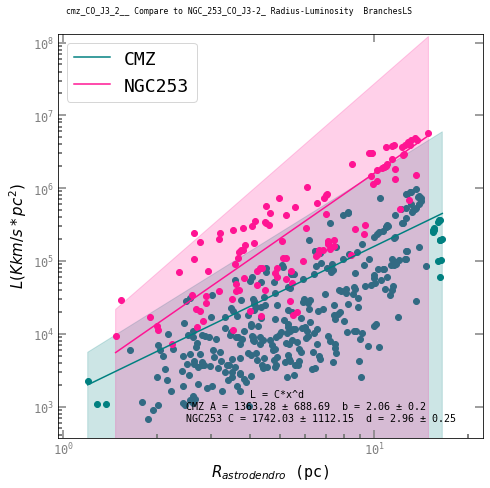

input data is of type linear fitting to powerlaw...
20.268080860021986 36546.59320225648 3.394682536217032 0.2329549831853796
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.826059202794343 111.116498195417
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.826059202794343, 0.22572412924996024] [111.116498195417, 49679.1276657713] 1.8477775620850927 589.4952098989578
[[ 1.91562058  4.45150248]
 [ 1.94287548  6.21952417]
 [ 1.94434279  6.65062078]
 ...
 [ 2.         10.        ]
 [ 2.         10.        ]
 [ 2.         10.        ]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_CO_J1_0_
    least sq  max like      MCMC
a   2.826059  1.847778  2.000000
a-  0.225724            0.000000
a+  0.225724            0.000000
c 111.116498589.495210 10.000000
c-49679.127666            0.000000
c+49679.127666            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.826059202794343 0.4751043351201505 8.761075000862995e+113 3.1657274653127743e+59 1.3076701052703585e+111
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999999987332 9.78496978246093e-07 999999999879.866 999999.9998079827 9999999998.827827
Using Least Squares fit min r = 9.5

cmz_CO_J1_0_ Compare to NGC_253_CO_J1-0_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  111.116498195417  +-  222.88815057281826 , b =  2.826059202794343  +-  0.4751043351201505

Structures plotted:  65

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
37.06946292

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_CO_J1-0_
    least sq  max like      MCMC
a   1.756914  2.808214  2.000000
a-  0.007258            0.000000
a+  0.007258            0.000000
c 59339.347287367.994610 10.000000
c-593471999.884140            0.000000
c+593471999.884140            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.756914232074203 0.085196194447331 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999999999999961 1.698993779866603e-07 999999999995.7543 999999.99999251 9999999999.958443
NGC253 fit params and covariance error: C =  59339.34728652881  +-  24361.280752130828 , d =  1.756914232074203  +-  0.085196194447331

Structures plotted:  79



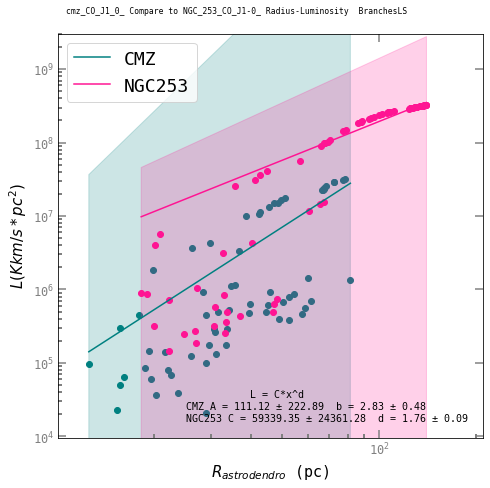

input data is of type linear fitting to powerlaw...
8.62121387031873 6674.63516963132 3.466552343623383 0.023329519599835473
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.194893937574562 53.4131609536709
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.194893937574562, 0.3366684945513568] [53.4131609536709, 4016.705584244768] 2.040302617631724 68.25694620759664
[[1.70498206 9.11704194]
 [1.70498206 9.11704194]
 [1.70498206 9.11704194]
 ...
 [1.99999977 9.99999064]
 [1.99999988 9.99998957]
 [1.99999987 9.99998761]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_SiO_J2_1_
    least sq  max like      MCMC
a   2.194894  2.040303  2.000000
a-  0.336668            0.000000
a+  0.336668            0.000001
c  53.413161 68.256946  9.999991
c-4016.705584            0.000007
c+4016.705584            0.000017



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.194893937574562 0.5802314146539782 4.055597916264227e+55 6.12449508943463e+29 2.589172309277055e+53
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999995412068543 0.0005854708666515998 999977713452.1584 999968.4879726307 9999787698.394308
Using Least Squares fit min r = 1

cmz_SiO_J2_1_ Compare to NGC_253_SiO_J2-1_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  53.4131609536709  +-  63.377484836846975 , b =  2.194893937574562  +-  0.5802314146539782

Structures plotted:  5

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8.55493555568021

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_SiO_J2-1_
    least sq  max like      MCMC
a   3.014565  3.373938  2.000000
a-  0.122234            0.000000
a+  0.122234            0.000000
c 117.114989 55.125213  9.999998
c-7145.604524            0.000001
c+7145.604524            0.000003



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 3.0145646168461098 0.3496196613819944 1.3475766672405863e+120 1.4890321470387976e+62 1.303133369287028e+117
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999179704437 0.0002483107686927022 999996053256.2258 999994.2474463383 9999962421.355316
NGC253 fit params and covariance error: C =  117.11498886589011  +-  84.53167763753389 , d =  3.0145646168461098  +-  0.3496196613819944

Structures plotted:  4



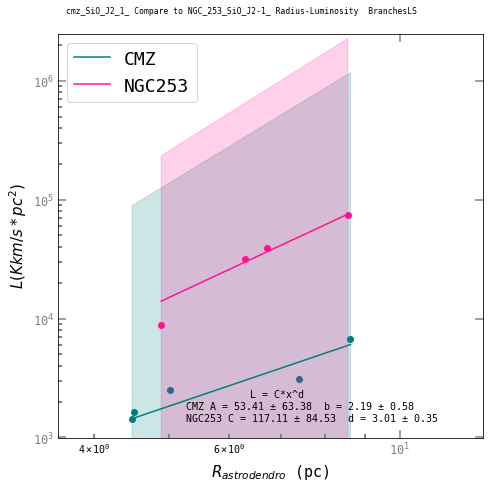

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_H13CN_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
7.724598111313055 1146.8138574781165 4.748336844220261 0.025805452356985528
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.3078818670174583 40.34341489113237
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.3078818670174583, 0.23732979098320986] [40.34341489113237, 1924.1282296603313] 2.8338963151886234 11.009271980800728
[[1.94971547 7.86611602]
 [1.94971547 7.86611602]
 [1.95538866 9.6965146 ]
 ...
 [1.99999965 9.99999749]
 [1.99999965 9.99999749]
 [1.99999965 9.99999749]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.307882  2.833896  2.000000
a-  0.237330            0.000000
a+  0.237330            0.000000
c  40.343415 11.009272  9.999997
c-1924.128230            0.000002
c+1924.128230            0.000006



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3078818670174583 0.4871650551745372 4.480193360991726e+42 1.4088774913067024e+23 2.205031973028944e+40
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998478249421 0.00033855559566483537 999992083482.651 999988.5883277338 9999924338.759583
Using Least Squares fit min r = 1

NOT AVAILABLE Compare to NGC_253_H13CN_J4-3_ Radius-Luminosity  BranchesLS

NGC_253_H13CN_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
2.5106115281142545 36614.99688793089 7.716779361685146 0.011902022278586314
masking bad values ...
restricting fit to [N

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_H13CN_J4-3_
    least sq  max like      MCMC
a  -2.188726 -2.188726  1.999996
a-       inf            0.000003
a+       inf            0.000008
c 274578.810714274578.810714  9.999952
c-       inf            0.000036
c+       inf            0.000089



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) -2.188726478492328 inf inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.999995583188557 0.0018226897158910463 999878537636.1617 999828.474253945 9998887065.367758
NGC253 fit params and covariance error: C =  274578.8107139624  +-  inf , d =  -2.188726478492328  +-  inf

Structures plotted:  2



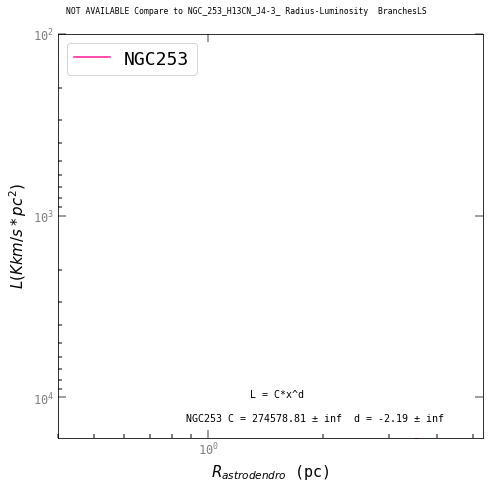

input data is of type linear fitting to powerlaw...
4.373498376264024 674.6084700519433 1.5588766882379388 0.022871040416542275
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.082148163234217 359.0292518810618
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.082148163234217, 0.014329166791884236] [359.0292518810618, 8828.793855464442] 2.746857467335643 75.17537496184167
[[1.99727678 7.71577141]
 [1.99727678 7.71577141]
 [1.99727678 7.71577141]
 ...
 [1.99999996 9.99999988]
 [1.99999996 9.99999988]
 [1.99999996 9.99999988]]
plotting walkers ...


mkdir: missing operand
Try 'mkdir --help' for more information.


Created 


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 cmz_HCN_J4_3_
    least sq  max like      MCMC
a   2.082148  2.746857  2.000000
a-  0.014329            0.000000
a+  0.014329            0.000000
c 359.029252 75.175375 10.000000
c-8828.793855            0.000000
c+8828.793855            0.000001



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.082148163234217 0.11970449779304133 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999799179033 0.00012307150938192275 999998979437.876 999998.5319446359 9999990256.785662
Using Least Squares fit min r = 1

cmz_HCN_J4_3_ Compare to NGC_253_HCN_J4-3_ Radius-Luminosity  BranchesLS

CMZ fit params and covariance error: a =  359.0292518810618  +-  93.96166162571011 , b =  2.082148163234217  +-  0.11970449779304133

Structures plotted:  70

Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
8.966983953764524 338740.4444836845 8.339472483866873 0.0052694946

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCN_J4-3_
    least sq  max like      MCMC
a   2.201396  2.116912  2.000000
a-  0.061393            0.000000
a+  0.061393            0.000000
c 3640.9927024273.299953 10.000000
c-4486221.803231            0.000000
c+4486221.803231            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2013957972700684 0.24777610877879852 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999999952103709 6.0181964116092014e-05 999999733205.4628 999999.6170670937 9999997442.339886
NGC253 fit params and covariance error: C =  3640.9927020905825  +-  2118.0703017678584 , d =  2.2013957972700684  +-  0.24777610877879852

Structures plotted:  16



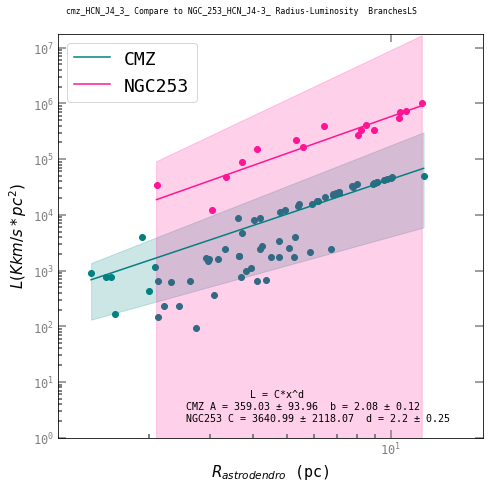

The beam or veloctiy resolution for NGC253 and the CMZ are not properly matched:
3.0 pc 4.8 pc
2.5 km / s 3.4 km / s
NGC_253_HCO+_J4-3_ NOT AVAILABLE
input data is of type linear fitting to powerlaw...
7.724598111313055 1146.8138574781165 4.748336844220261 0.025805452356985528
masking bad values ...
restricting fit to [None, None] ...
least squares fitting ...
Least squares fits to x and y, a and b: 2.3078818670174583 40.34341489113237
maximum likelihood fitting ...
Bayesian MCMC fitting ...
Least squares a c and ML: [2.3078818670174583, 0.23732979098320986] [40.34341489113237, 1924.1282296603313] 2.8338963151886234 11.009271980800728
[[1.9250179  3.39932551]
 [1.9250179  3.39932551]
 [1.9250179  3.39932551]
 ...
 [1.99999985 9.99999564]
 [1.99999985 9.99999564]
 [1.9999999  9.99999317]]
plotting walkers ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NOT AVAILABLE
    least sq  max like      MCMC
a   2.307882  2.833896  2.000000
a-  0.237330            0.000000
a+  0.237330            0.000000
c  40.343415 11.009272  9.999997
c-1924.128230            0.000003
c+1924.128230            0.000006



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.3078818670174583 0.4871650551745372 4.480193360991726e+42 1.4088774913067024e+23 2.205031973028944e+40
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.9999998485830817 0.0003370552150442186 999991926083.8531 999988.6321886743 9999922747.314379
Using Least Squares fit min r = 0.9

NOT AVAILABLE Compare to NGC_253_HCO+_J4-3_ Radius-Luminosity  BranchesLS

NGC_253_HCO+_J4-3_ is not available in the CMZ
Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s
input data is of type linear fitting to powerlaw...
12.076194157836447 1063605.9314251079 11.543670974087746 0.003403535932104292
masking bad values ...
restricting fit to 

mkdir: missing operand
Try 'mkdir --help' for more information.


plotting parameter distributions ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.


plotting x - y relation ...
Created 


mkdir: missing operand
Try 'mkdir --help' for more information.





 NGC_253_HCO+_J4-3_
    least sq  max like      MCMC
a   2.216428  2.195519  2.000000
a-  0.041256            0.000000
a+  0.041256            0.000000
c 3964.2643563971.243387 10.000000
c-3534796.582190            0.000000
c+3534796.582190            0.000000



LS fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 2.2164276260932056 0.20311592386858707 inf inf inf
MCMC fits results (b, b_err, sig_at_10_pc_, sig_at_10_pc_err, A) 1.99999999638568 5.22288016852873e-05 999999807273.9646 999999.714562381 9999998155.962423
NGC253 fit params and covariance error: C =  3964.264356349834  +-  1880.1054710281705 , d =  2.2164276260932056  +-  0.20311592386858707

Structures plotted:  16



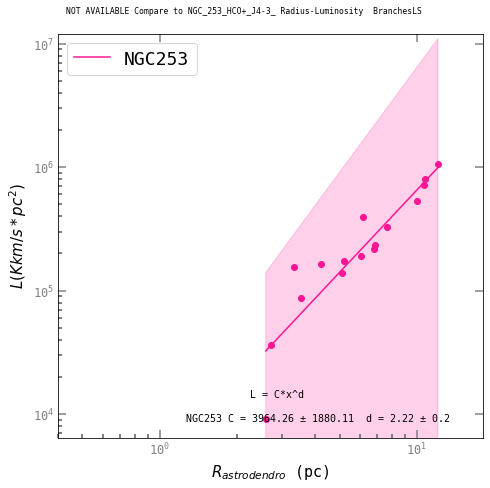

In [31]:
make_plots(CMZ_names,NGC_names,MCMC,use_manual_error_v_=[False,[0]],use_manual_error_r_=[True,r_errs],min_rs=min_rs,max_rs=max_rs,which="Branches",save_name="LS",fs=8,plot_errors=False)
with open("Result Files/LS fit results RL", 'wb') as file:
    pickle.dump([fit_results_cmz,fit_results_ngc], file) #save the fit resutls as form [[cmzall[vars,covars],leaves[vars,covars],branches[vars,covars]], [same for ngc]]


# Side by side plots

# Compare fit results for all lines

average parameters for LS fit results RL :
a_cmz = 235.03320373848217 +- 35.97299264170466
b_cmz = 2.401353906279872 +- 0.06830125616842589
a_ngc = 6436.55046929637 +- 1099.0521132217027
b_ngc = 2.0760112705154037 +- 0.10241056642215329


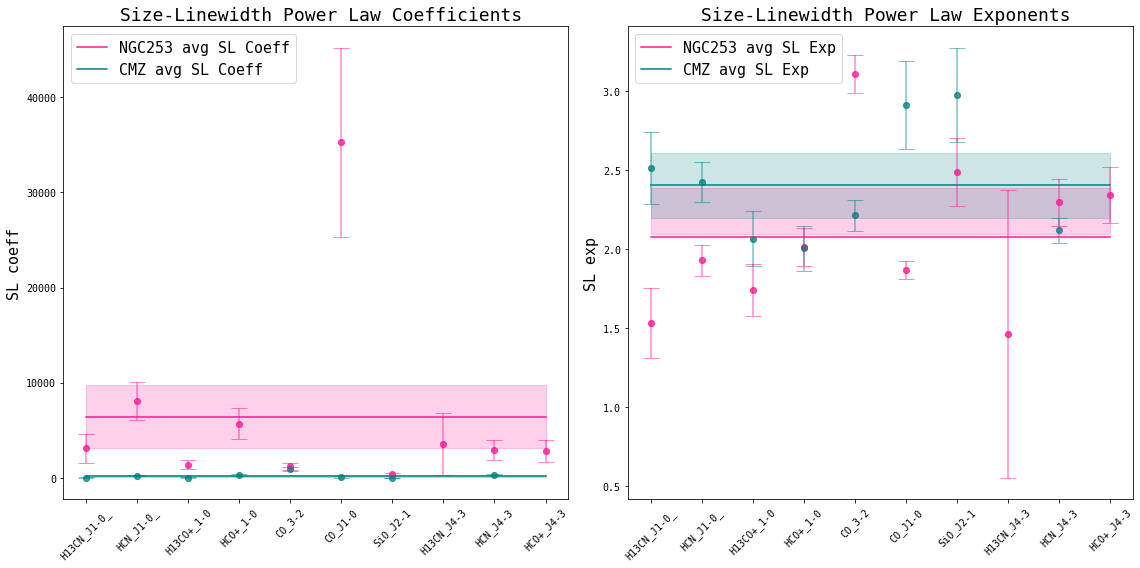

In [23]:
#
#All structures
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results RL", 'rb') as file:
#    save_name="MCMC fit results RL"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results RL", 'rb') as file:
    save_name="LS fit results RL"
    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no
CMZ_has_line_n=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,np.nan           ,1         ,np.nan]#1=yess 0=no

mean_c=0
mean_e=0
er_r=3
fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)

#for l in range(len(fit_results_ngc)):
fit_results_ngc = fit_results_ngc[0:len(Line_Names)]#all structures
fit_results_cmz = fit_results_cmz[0:len(Line_Names)]#all structures
#fit_results_ngc = fit_results_ngc[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_cmz = fit_results_cmz[len(Line_Names):len(Line_Names)*2]#leaves
#fit_results_ngc = fit_results_ngc[len(Line_Names)*2:]#branches
#fit_results_cmz = fit_results_cmz[len(Line_Names)*2:]#branches
c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
#for l in range(len(fit_results_ngc[0])):
for l in range(10):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='deeppink',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=8,color='deeppink',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='teal',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=8,color='teal',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='deeppink',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=8,color='deeppink',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='teal',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=8,color='teal',alpha=.5)
    
    if CMZ_has_line[l]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#########
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(10)#0 to 9
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="deeppink",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="teal",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="deeppink",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="teal",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="deeppink",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="teal",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="deeppink",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="teal",alpha=.2)

print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)
#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()

average parameters for LS fit results RL Leaves :
a_cmz = 340.01336007313114 +- 173.27191399287778
b_cmz = 1.653783617754097 +- 0.15252200524387677
a_ngc = 4372.94608637726 +- 2044.0364066164886
b_ngc = 1.8435002969180025 +- 0.18216001370373683


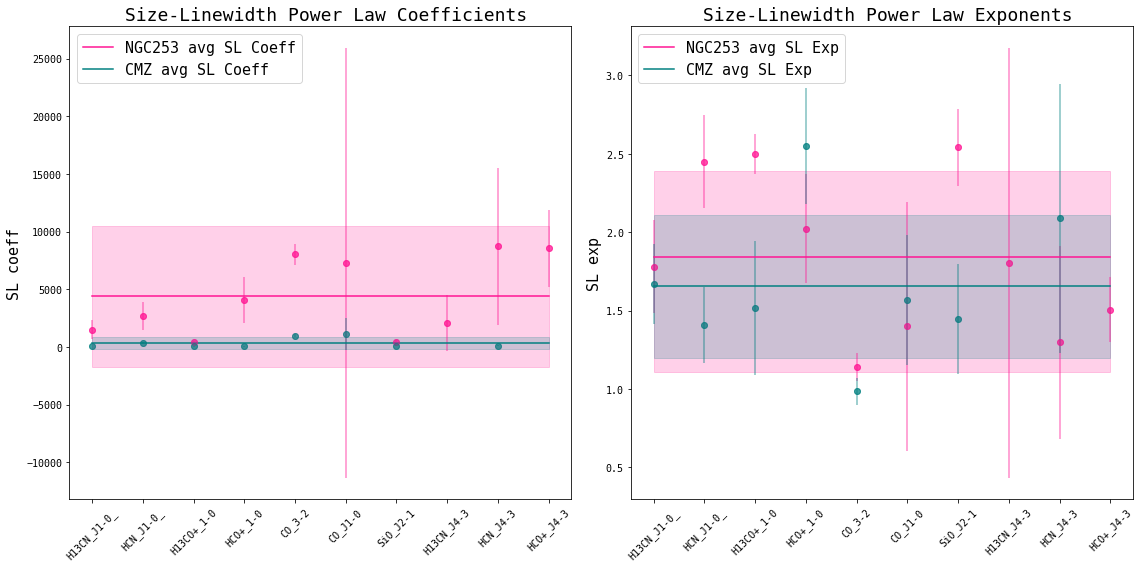

In [24]:
#
#Leaves
#
#
#Compare fits for molecules


#with open("Result Files/MCMC fit results RL", 'rb') as file:
#    save_name="MCMC fit results RL"
#    fit_results_cmz,fit_results_ngc = pickle.load(file)
    
with open("Result Files/LS fit results RL", 'rb') as file:
    save_name="LS fit results RL"
    fit_results_cmz,fit_results_ngc = pickle.load(file)

    
Line_Names = ["H13CN_J1-0_","HCN_J1-0_",'H13CO+_1-0',"HCO+_1-0","CO_3-2","CO_J1-0","SiO_J2-1","H13CN_J4-3","HCN_J4-3","HCO+_J4-3"]
CMZ_has_line=[1            ,1          ,1           ,1         ,1       ,1        ,1         ,0           ,1         ,0]#1=yess 0=no

mean_c=0
mean_e=0

fig = plt.figure(1,figsize=(16,8))
axA = pylab.subplot(1,2, 1)
axA2 = pylab.subplot(1,2, 2)


c1,c2,c3,c4=[],[],[],[]#for clarity, use these to store the values
n1,n2,n3,n4=[],[],[],[]#for clarity, use these to store the values
save_name+=" Leaves"
r=(10,20)
lmo=0
for l in range(r[0],r[1]):
    #num = len(fit_results_ngc[0])
    num = 10
    spacing =1 # /num +1
    #load the restults
    ngc_coeff,ngc_exp,ngc_coeff_err,ngc_exp_err = fit_results_ngc[0][l][0],fit_results_ngc[0][l][1],np.sqrt(fit_results_ngc[1][l][0][0]),np.sqrt(fit_results_ngc[1][l][1][1])
    cmz_coeff,cmz_exp,cmz_coeff_err,cmz_exp_err = fit_results_cmz[0][l][0],fit_results_cmz[0][l][1],np.sqrt(fit_results_cmz[1][l][0][0]),np.sqrt(fit_results_cmz[1][l][1][1])
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=np.nan,np.nan,np.nan,np.nan

    #plots exp
    axA2.scatter(spacing*l,ngc_exp,color='deeppink',alpha=.5)
    axA2.errorbar(spacing*l,ngc_exp, yerr= ngc_exp_err, fmt="o",capsize=0,color='deeppink',alpha=.5)
    axA2.scatter(spacing*l,cmz_exp,color='teal',alpha=.5)
    axA2.errorbar(spacing*l,cmz_exp, yerr= cmz_exp_err, fmt="o",capsize=0,color='teal',alpha=.5)
    #plots coeff
    axA.scatter(spacing*l,ngc_coeff,color='deeppink',alpha=.5)
    axA.errorbar(spacing*l,ngc_coeff, yerr= ngc_coeff_err, fmt="o",capsize=0,color='deeppink',alpha=.5)
    axA.scatter(spacing*l,cmz_coeff,color='teal',alpha=.5)
    axA.errorbar(spacing*l,cmz_coeff, yerr= cmz_coeff_err, fmt="o",capsize=0,color='teal',alpha=.5)
    
    if CMZ_has_line[lmo]==0:
        cmz_coeff,    cmz_exp,    cmz_coeff_err ,    cmz_exp_err=0,0,0,0 #set to zero for simplicifty
    c1.append(cmz_coeff), c2.append(cmz_exp), c3.append(cmz_coeff_err), c4.append(cmz_exp_err)
    n1.append(ngc_coeff), n2.append(ngc_exp), n3.append(ngc_coeff_err), n4.append(ngc_exp_err)
    lmo+=1
#    
#make averages
avg_cmz_coeff = np.dot(c1,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_cmz_exp = np.dot(c2,CMZ_has_line)/np.sum(CMZ_has_line)#sum the actual lines that have data and then take the mean
avg_ngc_coeff = np.mean(n1)
avg_ngc_exp = np.mean(n2)
#propagate errors to mean (sum square; take square root, divide by n)
avg_cmz_coeff_err = np.sqrt(np.sum(err**2 for err in np.array(c3)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_cmz_exp_err = np.sqrt(np.sum(err**2 for err in np.array(c4)*np.array(CMZ_has_line)))/np.sum(CMZ_has_line)#
avg_ngc_coeff_err = np.sqrt(np.sum(err**2 for err in n3))/len(Line_Names)#
avg_ngc_exp_err = np.sqrt(np.sum(err**2 for err in n4))/len(Line_Names)#


#n = range(len(fit_results_ngc))#0 to 9
n = range(r[0],r[1])
err_r = 3 #the sigma to plot
axA.plot(n,np.full(len(n),avg_ngc_coeff),color="deeppink",label="NGC253 avg SL Coeff")
axA.plot(n,np.full(len(n),avg_cmz_coeff),color="teal",label="CMZ avg SL Coeff")
axA2.plot(n,np.full(len(n),avg_ngc_exp),color="deeppink",label="NGC253 avg SL Exp")
axA2.plot(n,np.full(len(n),avg_cmz_exp),color="teal",label="CMZ avg SL Exp")

axA.fill_between(n,np.full(len(n),avg_ngc_coeff+err_r*avg_ngc_coeff_err),np.full(len(n),avg_ngc_coeff-er_r*avg_ngc_coeff_err),color="deeppink",alpha=.2)
axA.fill_between(n,np.full(len(n),avg_cmz_coeff+err_r*avg_cmz_coeff_err),np.full(len(n),avg_cmz_coeff-er_r*avg_cmz_coeff_err),color="teal",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_ngc_exp+err_r*avg_ngc_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_ngc_exp_err),color="deeppink",alpha=.2)
axA2.fill_between(n,np.full(len(n),avg_cmz_exp+err_r*avg_cmz_exp_err),np.full(len(n),avg_cmz_exp-er_r*avg_cmz_exp_err),color="teal",alpha=.2)
print("average parameters for",save_name,":")
print("a_cmz =",avg_cmz_coeff,"+-",avg_cmz_coeff_err)
print("b_cmz =",avg_cmz_exp,"+-",avg_cmz_exp_err)
print("a_ngc =",avg_ngc_coeff,"+-",avg_ngc_coeff_err)
print("b_ngc =",avg_ngc_exp,"+-",avg_ngc_exp_err)

#set line labels
axA.set_xticks(n)
axA.set_xticklabels(Line_Names, rotation=45)
axA2.set_xticks(n)
axA2.set_xticklabels(Line_Names, rotation=45)


axA.set_ylabel('SL coeff',fontsize=15)
axA2.set_ylabel('SL exp',fontsize=15)


axA.set_title(" Size-Linewidth Power Law Coefficients", fontsize=18)
axA2.set_title(" Size-Linewidth Power Law Exponents", fontsize=18)

axA.legend(loc='upper left',fontsize=15,)
axA2.legend(loc='upper left',fontsize=15,)


plt.tight_layout()  # avoids label cutoff


fig.savefig(bbox_inches='tight',fname=save_name+" all lines.png")

pylab.show()